# Classification and prediction

## Introduction

This notebook is the first part to the project; Bicycle Karma: Predicting and tracking bike theft. The dataset was obtained from https://bikeindex.org via the provided API. The objective of this ipython notebook is to understand whether the bikes in the dataset can be classified as "stolen" or "not stolen", given the features of the bikes by running machine learning algorithms. 

This project aims to identify the key features or factors that contributed to bike theft in the past and to construct a bike theft prediction model

This part deals with data cleansing, exploring the dataset and features through visualizations, running classification models, and evaluation of each classification model.Each classification model was validated and evaluated by ROC curves, sensitivity, specificity, and accuracy scores

## Classification

Classification is the most widely used technique in data mining to construct models and to predict the outcome in unseen data. Even though the bike theft occurs due to random factors, this project aims to use different classifiers in order to identify the other key factors that could have played a role in the bike getting stolen.

The supervised Machine learning algorithms used in this analysis are:
1. Decision Tree
2. Random Forest
3. Logistic regression model
4. Support Vector Machine (SVM)

In the following sections, these classifiers are explored and the plots and results are presented for the same


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## Preliminary Data Analysis

After obtaining all available data through API calls, the first step was ofcourse evaluating our  dataset and also defining the scope of our analysis through this process. To drive our group conversations, we created a summary spreadsheet of the data ([Data Dictionary](https://docs.google.com/spreadsheets/d/1EAWIMkVafj-bm9-3bTq5vi2PMjIJuN9Pz_62JCg7p-4/edit?usp=sharing)) to collect our thoughts in a central place

We did some brain storming to identify and mark attributes that are to be within our scope of analysis. We decided to remove some columns from the dataset which fell into one of the following categories
1. Did not contain data which was not relavent for the problem we were trying to solve. 
2. The feature is relevant, but the data was too sparse
3. The feature is relevant, but redundant in that the information represent is already available in a better fashion in another column.

Also, following are some ideas which we considered based on the data that could be obtained additionally , but decided not to pursue in the interest of time.

1) Crime rate information : The zip code along with year could be used to derive the crime rate information of that county and could have helped examine the correlation of crime rate and bike theft. The Crimescore API (https://market.mashape.com/yourmapper/crimescore) was apt for this task but the API was not free. Hence we did not explore this option further.

2) Weather data : Lat/Long data can be used to look up weather information on the date on which bike was stolen, thus helping analyze role of weather in a bike theft. However we decided not to pursue this path, because of two reasons 
    i ) The historical weather data was not available freely and could be obtained through pay-per-use API's. We evaluated all of the API's listed at -http://stackoverflow.com/questions/2368722/are-there-any-weather-history-apis and also did some search on our own as well 
    ii ) Exact time of theft ( noon/evening/night etc) was not available in the dataset.

3) Points of Interest(POI): POIs near the lat/long of stolen location could be analyzed for common patterns. We decided that this a "good to have" and revisit it after analyzing other low hanging fruits in the interest of time.


## Data Handling


In [2]:
df = pd.read_csv("bike_details_csv.csv")
df.head()

,Unnamed: 0,id,title,serial,manufacturer_name,frame_model,year,thumb,large_img,is_stock_img,stolen,stolen_location,date_stolen,registration_created_at,registration_updated_at,url,api_url,manufacturer_id,paint_description,name,frame_size,description,rear_tire_narrow,front_tire_narrow,type_of_cycle,test_bike,rear_wheel_size_iso_bsd,front_wheel_size_iso_bsd,handlebar_type_slug,frame_material_slug,front_gear_type_slug,rear_gear_type_slug,stolen_id,s_date_stolen,s_location,latitude,longitude,theft_description,locking_description,lock_defeat_description,police_report_number,police_report_department,s_rec_created_at,create_open311,sder_formatted_address,sder_street_number,sder_route,sder_postal_code,sder_neighborhood,sder_city,sder_county,sder_state,sder_country,date_stolen_epoch,registration_created_at_epoch,registration_updated_at_epoch,s_rec_created_at_epoch
0,0,50088,Schwinn Gateway,absent,Schwinn,Gateway,NaN,NaN,NaN,False,False,NaN,1970-01-01 00:00:00,2015-07-06 22:27:01,2015-11-03 05:36:54,https://bikeindex.org/bikes/50088,https://bikeindex.org/api/v1/bikes/50088,117,NaN,NaN,NaN,NaN,True,NaN,Bike,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1436221621,1446529014,0
1,1,60140,2016 Specialized Diverge Elite DSW,WSBC601010269K,Specialized,Diverge Elite DSW,2016,NaN,NaN,False,False,NaN,1970-01-01 00:00:00,2015-10-08 19:18:50,2015-11-03 05:34:30,https://bikeindex.org/bikes/60140,https://bikeindex.org/api/v1/bikes/60140,307,NaN,NaN,52cm,NaN,True,NaN,Bike,False,NaN,NaN,NaN,aluminum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1444331930,1446528870,0
2,2,44884,2016 Specialized '15 Crosstrail Sport Disc,WSBC606249640J,Specialized,'15 Crosstrail Sport Disc,2016,NaN,NaN,False,False,NaN,1970-01-01 00:00:00,2015-05-08 00:30:25,2015-11-03 05:32:55,https://bikeindex.org/bikes/44884,https://bikeindex.org/api/v1/bikes/44884,307,Blk/Char/Red,NaN,xl,'15 Crosstrail Sport Disc,True,NaN,Bike,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1431045025,1446528775,0
3,3,11542,2013 Trek 4300,WTU124C5170G,Trek,4300,2013,NaN,NaN,False,True,"San Jose, CA, 95126",2013-06-10 06:00:00,2013-08-20 06:00:00,2015-11-03 05:11:14,https://bikeindex.org/bikes/11542,https://bikeindex.org/api/v1/bikes/11542,47,NaN,NaN,NaN,"Trek 4300, Mountain bicycle, disc brakes, blac...",True,NaN,Bike,False,NaN,NaN,NaN,NaN,NaN,NaN,7889,1370844000,"San Jose, CA, 95126",37.329012,-121.916021,bike rack,NaN,NaN,T13006853,San Jose,2014-06-14 17:52:49,False,"1323 Martin Ave, San Jose, CA 95126, USA",1323,Martin Avenue,95126,Shasta-Hanchett Park,San Jose,Santa Clara County,California,United States,1370844000,1376978400,1446527474,1402768369
4,4,13359,2010 Schwinn Katana,absent,Schwinn,Katana,2010,https://files.bikeindex.org/uploads/Pu/4903/sm...,https://files.bikeindex.org/uploads/Pu/4903/la...,False,True,"Sandusky, OH, 44870",2010-07-10 06:00:00,2010-07-11 06:00:00,2015-11-03 05:17:53,https://bikeindex.org/bikes/13359,https://bikeindex.org/api/v1/bikes/13359,117,NaN,NaN,58cm,"The bike is a grey, blue, and black Schwinn Ka...",True,NaN,Bike,False,NaN,NaN,NaN,NaN,NaN,NaN,9705,1278741600,"Sandusky, OH, 44870",41.440356,-82.768114,car bike rack Reward: $75,NaN,NaN,2010004433,Sandusky,2014-06-14 18:17:08,False,"4614 Venice Heights Blvd, Sandusky, OH 44870, USA",4614,Venice Heights Boulevard,44870,NaN,Sandusky,Erie County,Ohio,United States,1278741600,1278828000,1446527873,1402769828


In [3]:
df.shape

(59619, 57)

In [4]:
df.columns

Index([u'Unnamed: 0', u'id', u'title', u'serial', u'manufacturer_name', u'frame_model', u'year', u'thumb', u'large_img', u'is_stock_img', u'stolen', u'stolen_location', u'date_stolen', u'registration_created_at', u'registration_updated_at', u'url', u'api_url', u'manufacturer_id', u'paint_description', u'name', u'frame_size', u'description', u'rear_tire_narrow', u'front_tire_narrow', u'type_of_cycle', u'test_bike', u'rear_wheel_size_iso_bsd', u'front_wheel_size_iso_bsd', u'handlebar_type_slug',
       u'frame_material_slug', u'front_gear_type_slug', u'rear_gear_type_slug', u'stolen_id', u's_date_stolen', u's_location', u'latitude', u'longitude', u'theft_description', u'locking_description', u'lock_defeat_description', u'police_report_number', u'police_report_department', u's_rec_created_at', u'create_open311', u'sder_formatted_address', u'sder_street_number', u'sder_route', u'sder_postal_code', u'sder_neighborhood', u'sder_city', u'sder_county', u'sder_state', u'sder_country',
       u'

## Exploratory Analysis

In [5]:
# Identifying features that have less than entries

for v in df.columns:
    l=df[v].unique()
    if len(l) <= 30:
        print v, l


is_stock_img [False True]
stolen [False True]
rear_tire_narrow [True False]
front_tire_narrow [nan False True]
type_of_cycle ['Bike' 'Tricycle' 'Cargo Tricycle (rear storage)'
 'Cargo Bike (rear storage)' 'Cargo Bike (front storage)' 'Recumbent'
 'Bike Trailer' 'Cargo Tricycle (front storage)' 'Unicycle' 'Tandem'
 'Trail behind (half bike)' 'Tall Bike']
test_bike [False]
rear_wheel_size_iso_bsd [  nan  559.  622.  507.  584.  406.  630.  305.  540.  571.  635.  599.
  597.  355.  203.  587.  337.  137.  520.  457.  349.  547.  590.  419.
  451.  369.]
front_wheel_size_iso_bsd [  nan  559.  622.  507.  584.  406.  630.  305.  635.  571.  597.  599.
  355.  203.  520.  587.  337.  137.  457.  349.  547.  590.  419.  451.
  335.  540.  369.  152.]
handlebar_type_slug [nan 'flat' 'drop' 'rearward' 'bmx' 'other' 'forward']
frame_material_slug [nan 'aluminum' 'steel' 'composite' 'titanium' 'organic']
front_gear_type_slug [nan '3' '2' '1' '3-internal' '2-internal']
rear_gear_type_slug [nan '7



From this dataframe, the features that are important are identified using the google spreadsheet and used in the classification model. The features that were available only for stolen data (eg. stolen location, and stolen date etc.) were removed. The next step was to remove the features with redundant information and the features that are too sparse which brought down the total number of features to 12. This data cleansing resulted in 11 categorical variables and 1 quantitative variable (year) in the dataset that will be used for our classification model. There were around 14000 null entries in the year column which was also removed during this process. Hence the dataset has around 45000 rows and 12 columns.  The 'Y' variable in our dataset is stolen for which it is "True" or "1" if the bike was stolen and "False" or "0", if it was not.

The frame size in the dataset was entered in diffent units like size, cm, and inches. All the entries in the frame size standardized to six different categories XXS, XS, S, M, L, XL. The size range for each category was provided below in this section

In [6]:
# Removing columns which do not hold any useful data
df_clean = df.drop ( ['Unnamed: 0', 'id' , 'title' , 'serial' ,'stolen_id', 
            'thumb', 'large_img', 'is_stock_img' , 'url' , 'api_url',
            's_location', 'latitude', 'longitude', 'name',
            'stolen_location' , 'test_bike' , 'type_of_cycle' ,
            'theft_description', 'locking_description', 'lock_defeat_description', 
            'police_report_number', 'police_report_department',  
            'create_open311', 'sder_formatted_address', 'sder_street_number', 'sder_route', 
            'sder_postal_code', 'sder_neighborhood', 'sder_city', 'sder_county', 'sder_state', 
            'sder_country' ] , axis = 1 )

In [7]:
# Removing columns with repeated information
df_clean = df_clean.drop ( [ 'registration_created_at_epoch' ,'s_date_stolen',  'registration_updated_at_epoch' ,
            's_rec_created_at', 'date_stolen_epoch', 's_rec_created_at_epoch', 'date_stolen', 
            'registration_created_at', 'registration_updated_at'] , axis = 1 )

In [8]:
df_clean.shape

(59619, 16)

In [9]:
# Removing columns with Too sparse data
df_clean = df_clean.drop ( ['frame_model'] , axis = 1 )

In [10]:
df_clean.shape

(59619, 15)

## Exploratory Visualization

Exploring 20 most frequent values in each feature column and visually examining if there is any difference between entries corresponding to stolen bikes and not stolen bikes

In [11]:
#http://stackoverflow.com/questions/16010869/python-plot-a-bar-using-matplotlib-using-a-dictionary
#http://stackoverflow.com/questions/7197315/5-maximum-values-in-a-python-dictionary
#http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib

import matplotlib.pyplot as plt
import operator
from matplotlib.pyplot import cm 

""" The plotDictionary function below accepts a dictionary contains count values of keys(D) ,number of keys to be plotted(topN)
,axis(ax) ,color(c) ,name of feature column from which the keys were derived(columnName) ,label rotation (labelRotation) ,order 
in which to plot the keys(sortedKeyList). The topN argument is ignored if sortedKeyList is provided."""

def plotDictionary(D, topN = -1 , ax = None , c = 'g' , columnName = None , labelRotation = 60 , sortedKeyList = None):
    if ax is None:
        fig , (ax) = plt.subplots( nrows = 1 , ncols = 1 ,figsize=(14,5) )

    if sortedKeyList is not None:
        D1 = []
        for key in sortedKeyList :
            if D.has_key(key):
                tmp = D[key]
            else :
                tmp = 0
            D1.append(( key ,tmp ))
        D = D1
    else :
        if topN != -1:
            D = (sorted(D.iteritems(), key=operator.itemgetter(1), reverse=True)[:topN])
 
    ax.bar(range(len(D)), [ item[1] for item in D], align='center' , alpha = 0.2, color = c)
    ax.set_xticks(range(len(D)))
    ax.set_title(columnName)
    ax.set_ylabel('Frequency') 
    ax.grid(False)
    ax.set_xticklabels( [ str(item[0]).decode('utf-8')[:20] for item in D] , rotation = labelRotation )
    ax.legend()
    return ax

/home/anusha/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


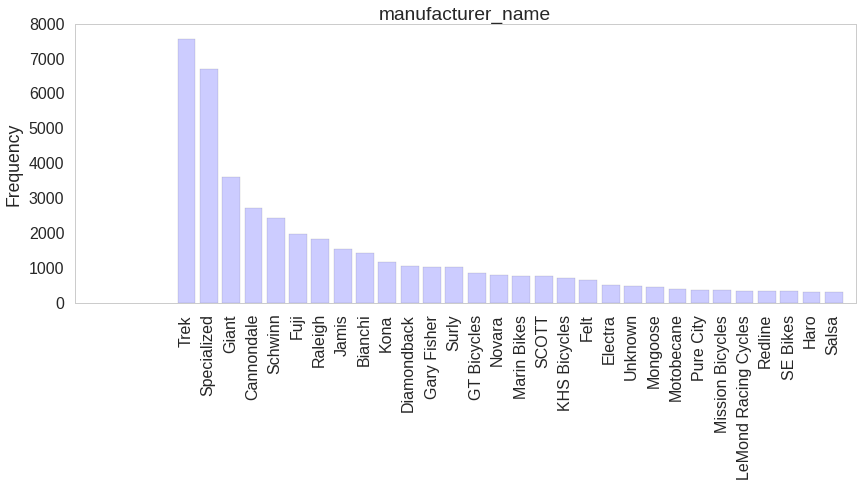

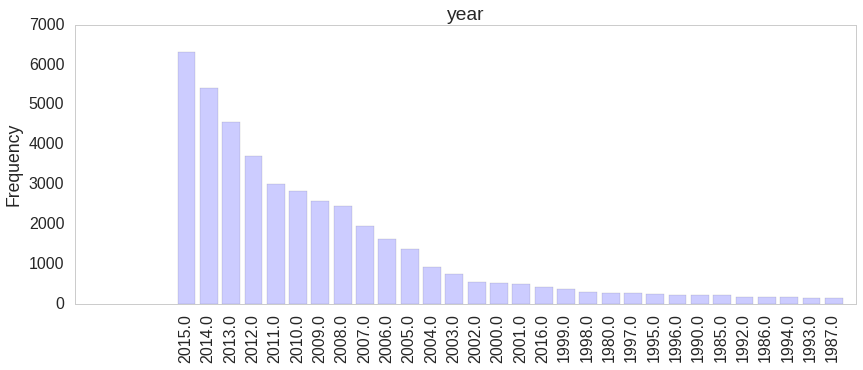

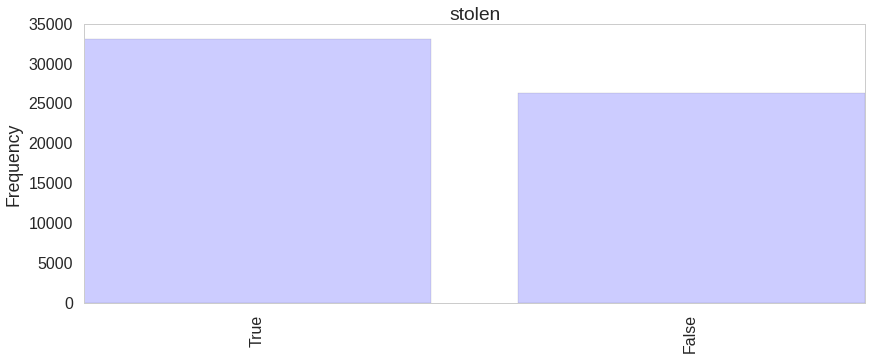

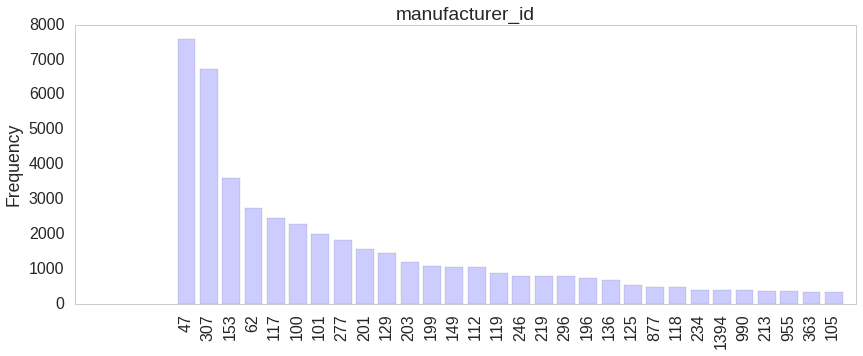

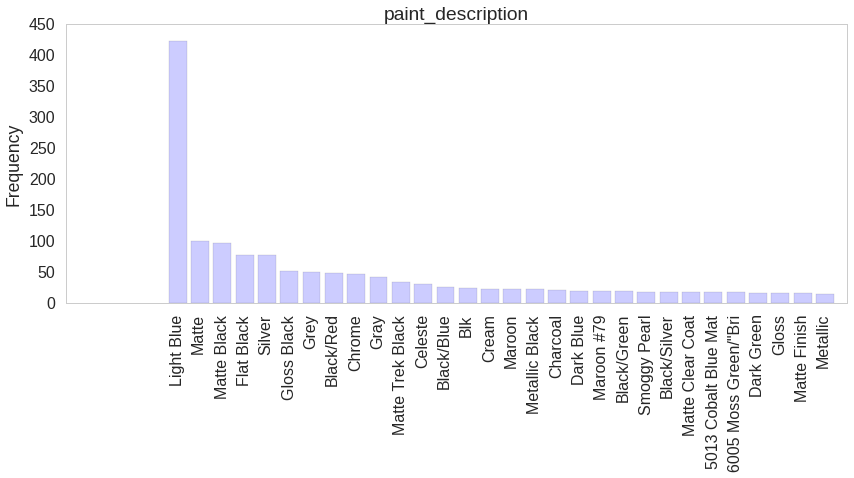

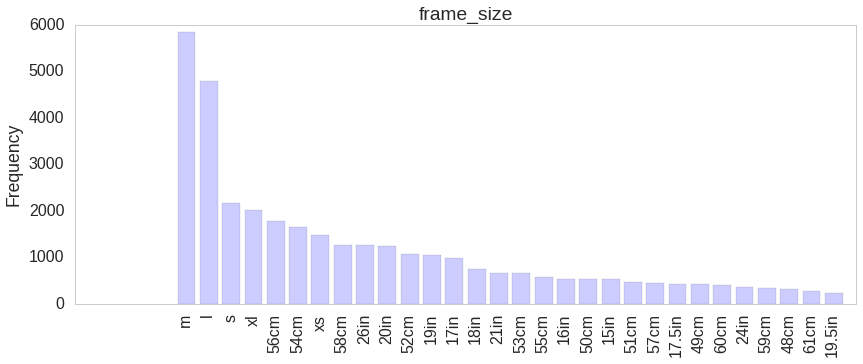

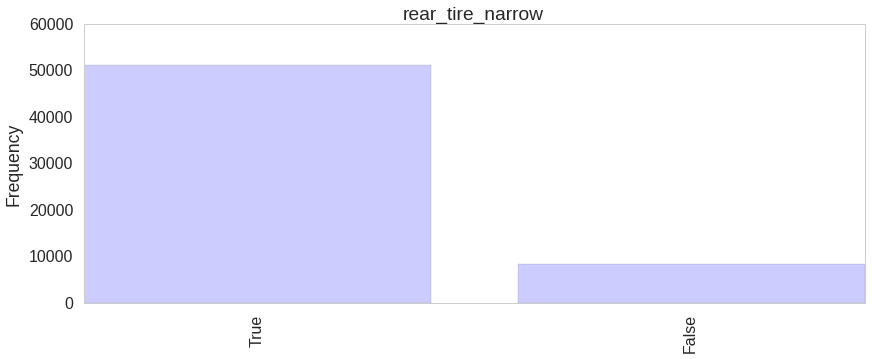

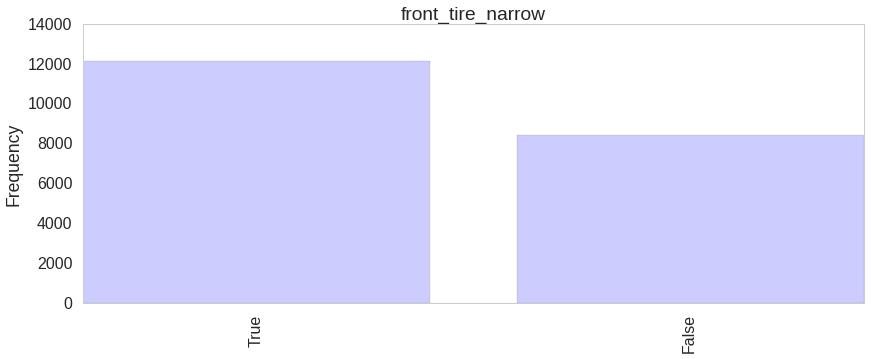

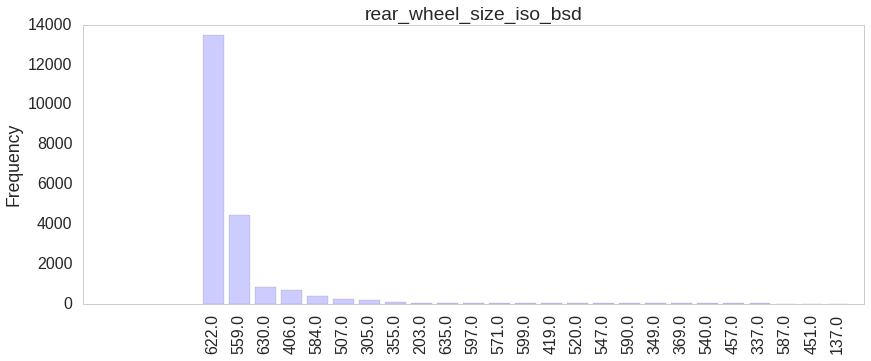

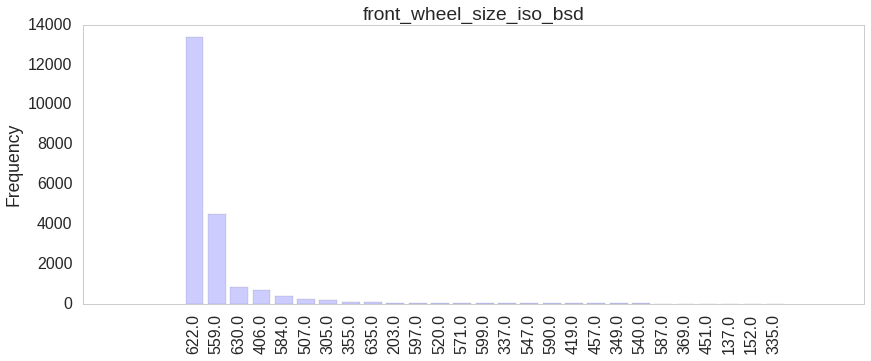

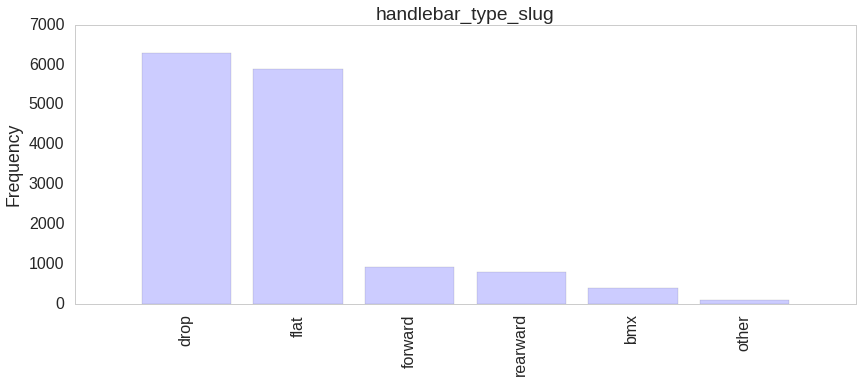

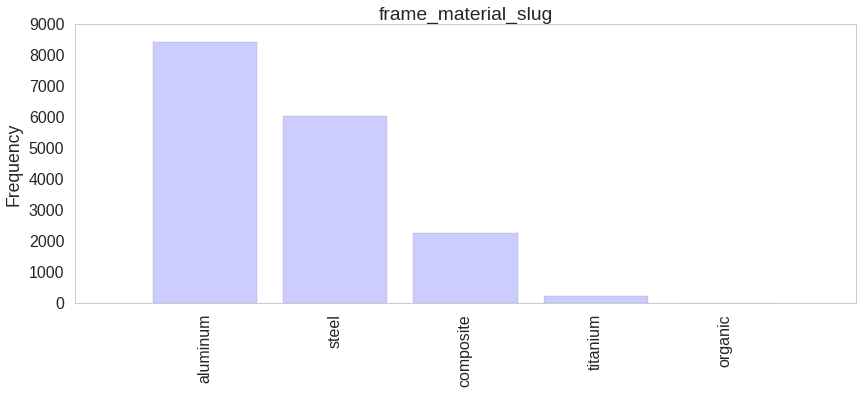

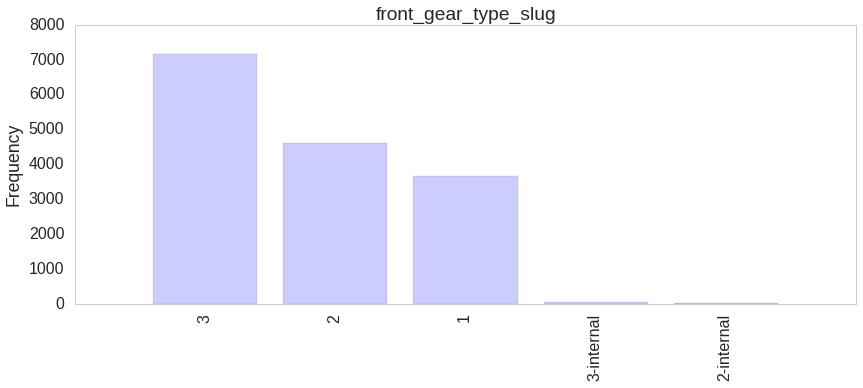

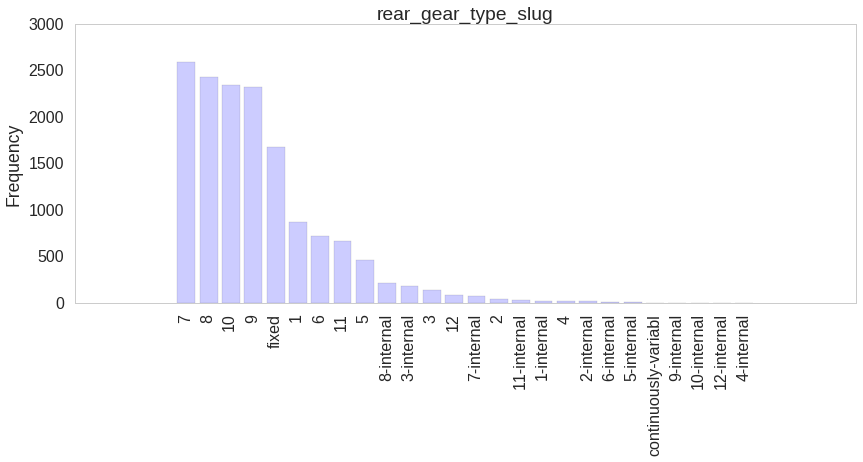

In [12]:
# To select top 30 (based on frequency or count) in each feature
df_clean1 = df_clean.drop(["description"], axis = 1)
for v in df_clean1.columns:
    plotDictionary ( 
    dict (  df[v].value_counts()) 
    , topN = 30 
    , ax = None 
    , c = 'b'
    , columnName = v
    , labelRotation = 90)

In [13]:
import matplotlib.patches as mpatches

# to plot stolen and not stolen bikes for each feature in the same graph

def createOverlappingDistributionPlotOfTargetValuesByColumn( df , columnToBePlotted, targetColumnName ,countOfItemsToPlot = -1 , ax = None  ) :
    if  countOfItemsToPlot != -1 :
        sortList = df[columnToBePlotted].value_counts().index.values[:countOfItemsToPlot]
    else :
        sortList = df[columnToBePlotted].value_counts().index.values
# for stolen bikes        
    ax = plotDictionary ( 
        dict (  df.iloc[ np.where(df[targetColumnName] == True)][columnToBePlotted].value_counts()) 
        , topN = countOfItemsToPlot 
        , ax = ax
        , c = 'red'
        , columnName = "overlay bar-chart : " + columnToBePlotted
        , labelRotation = 90 
        , sortedKeyList = sortList )

# for not stolen bikes
    ax = plotDictionary ( 
        dict (  df.iloc[ np.where(df[targetColumnName] == False)][columnToBePlotted].value_counts()) 
        , topN = countOfItemsToPlot
        , ax = ax
        , c = 'blue'
        , columnName = "overlay bar-chart : " + columnToBePlotted
        , labelRotation = 90
        , sortedKeyList = sortList )
    
    red_patch = mpatches.Patch(color='red', label='stolen bikes' , alpha = 0.2)
    green_patch = mpatches.Patch(color='blue', label='not stolen bikes' , alpha = 0.2)
    ax.legend(handles=[green_patch , red_patch])
    ax.set_xlabel(columnToBePlotted)
    ax.grid(False)

    return ax


In [14]:
df_clean.isnull().sum()

manufacturer_name               1
year                        14579
stolen                          0
manufacturer_id                 0
paint_description           51621
frame_size                  21371
description                 18005
rear_tire_narrow                0
front_tire_narrow           39037
rear_wheel_size_iso_bsd     39211
front_wheel_size_iso_bsd    39166
handlebar_type_slug         45244
frame_material_slug         42604
front_gear_type_slug        44084
rear_gear_type_slug         44523
dtype: int64

Upto 60% of values are missing in some of the columns. Since imputing such a large portion of data with most frequent value will
introduce lot of bias, we decided to treat value=missing as a feature in itself

The individual columns in the dataset are explored in detail below.

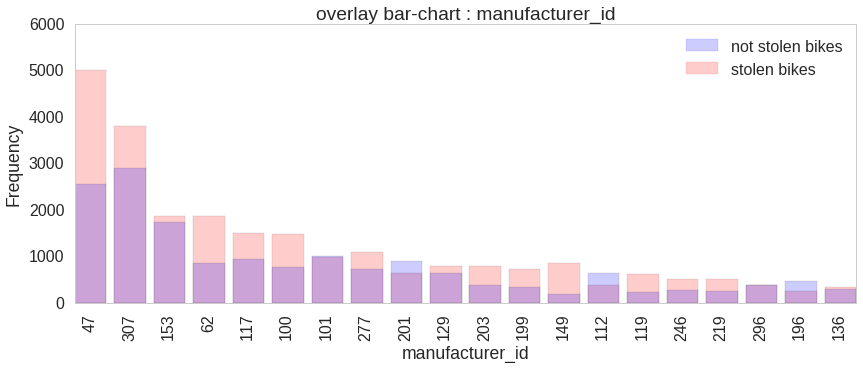

In [15]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'manufacturer_id' , 'stolen' , 20 , None)

It seems certain manufacturers have higher portion of stolen bikes when compared to others

In [16]:
# The manufacturer id is converted to string type as it is not numerical in nature even though it is 
# represented using numbers
df_clean['manufacturer_id'] = df_clean.manufacturer_id.apply(str)

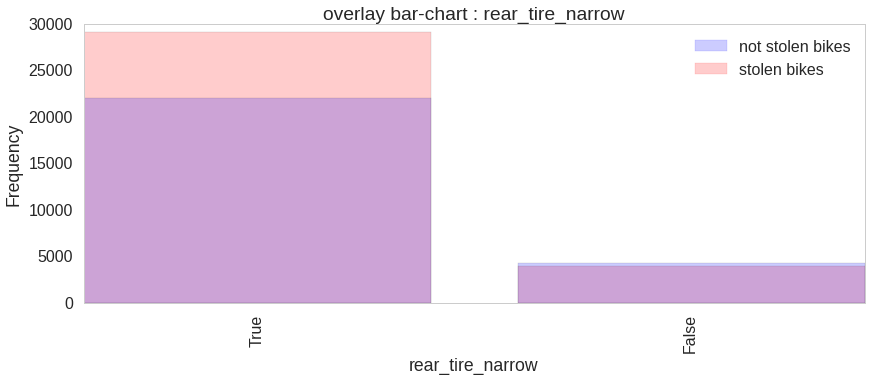

In [17]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'rear_tire_narrow' , 'stolen' , 20 , None)

Bikes with narrow rear tires seems to have a higher propensity to get stolen

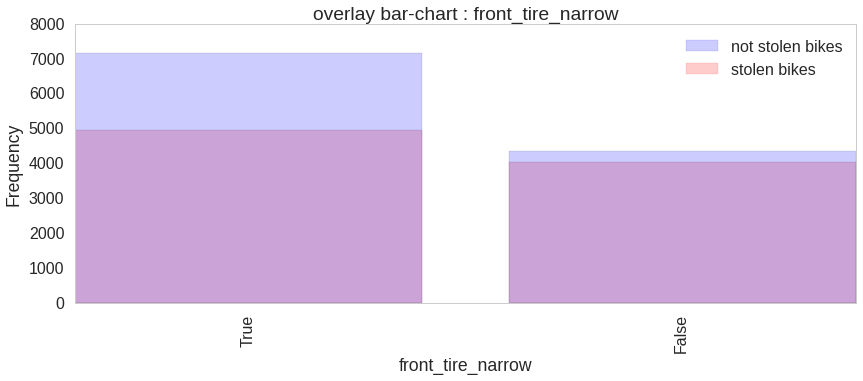

In [18]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'front_tire_narrow' , 'stolen' , 20 , None)

Front tire being narrow does not seem to have the same effect as the back tire being narrow.

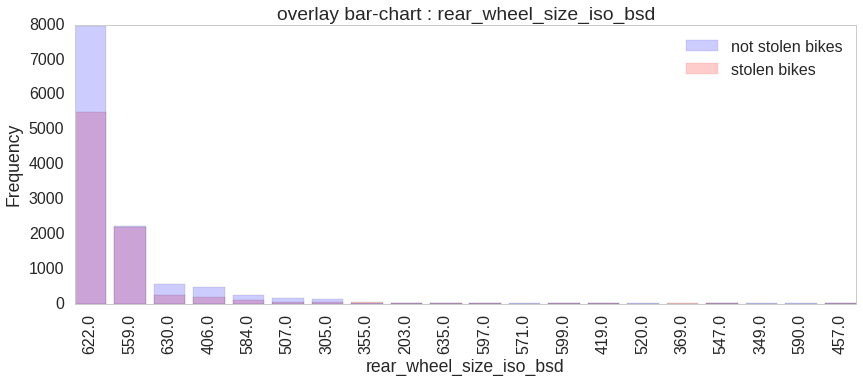

In [19]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'rear_wheel_size_iso_bsd' , 'stolen' , 20 , None)

In [20]:
# Converting rear wheel size into a categorical column
df_clean['rear_wheel_size_iso_bsd'] = df_clean.rear_wheel_size_iso_bsd.apply(str)

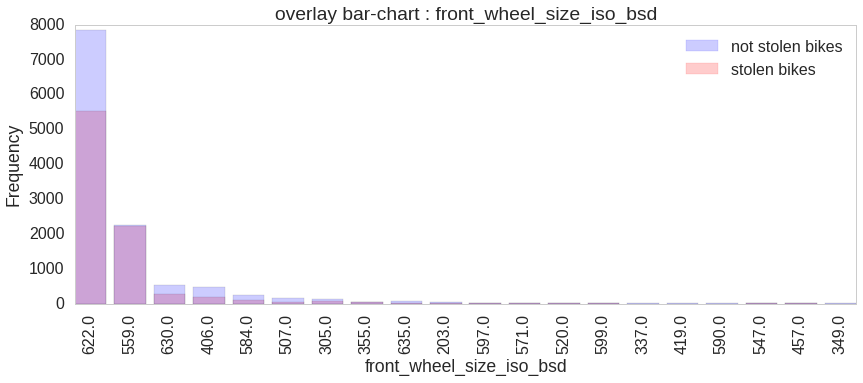

In [21]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'front_wheel_size_iso_bsd' , 'stolen' , 20 , None)

In [22]:
# Converting front wheel size into a categorical column
df_clean['front_wheel_size_iso_bsd'] = df_clean.front_wheel_size_iso_bsd.apply(str)

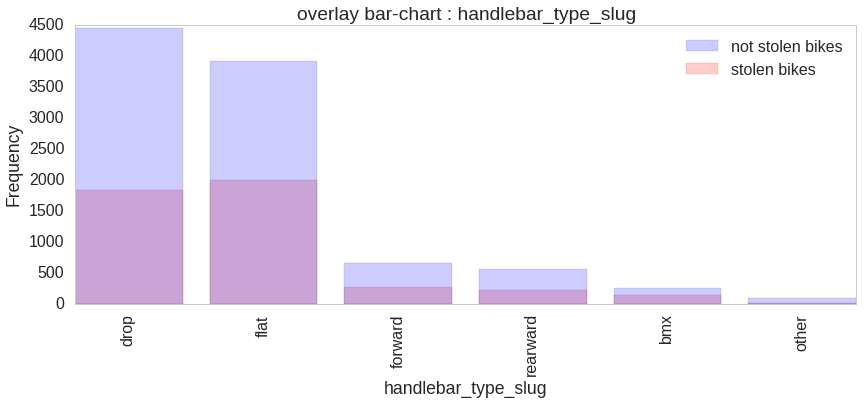

In [23]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'handlebar_type_slug' , 'stolen' , 20 , None)

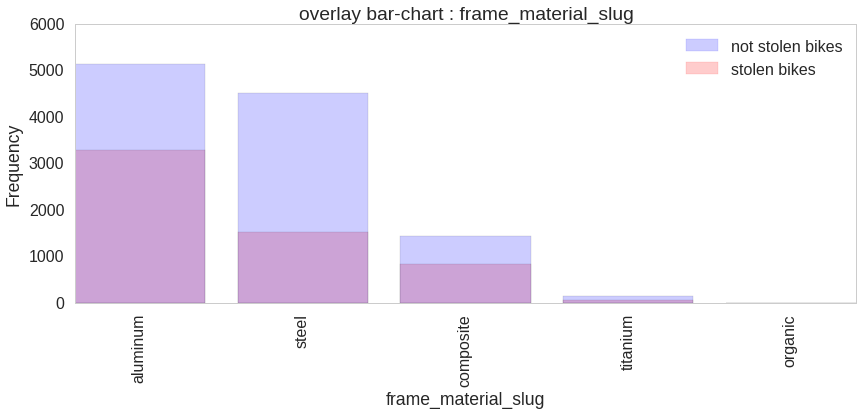

In [24]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'frame_material_slug' , 'stolen' , 20 , None)

Bikes with steel as frame material seems to have lesser proportion of stolen bikes

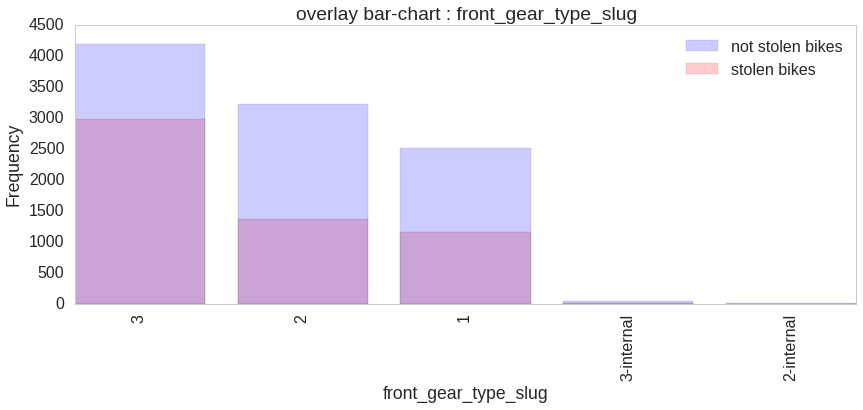

In [25]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'front_gear_type_slug' , 'stolen' , 20 , None)

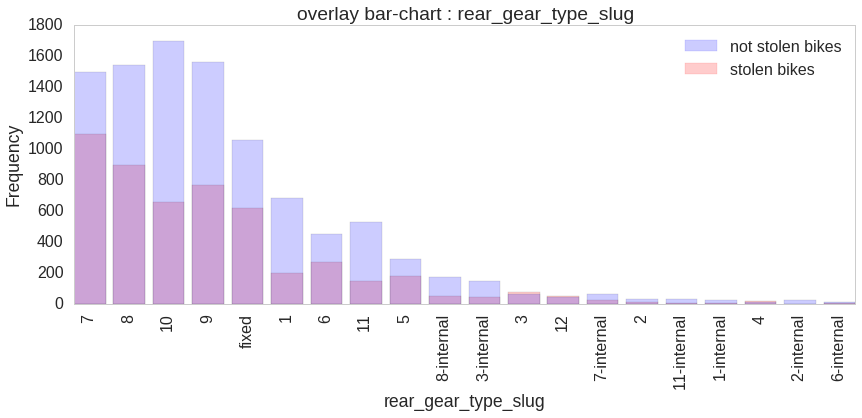

In [26]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'rear_gear_type_slug' , 'stolen' , 20 , None)

Propensity to get stolen seems to peak around rear gear count of 7

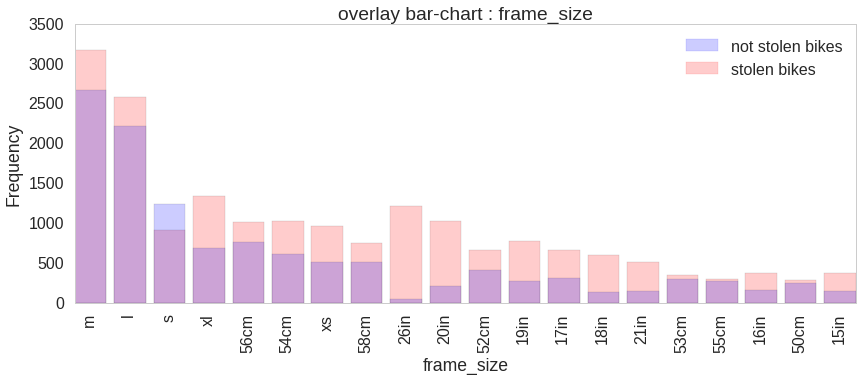

In [27]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'frame_size' , 'stolen' , 20 , None)

Frame size columns contain multiple values and needs to be standardized. Some of the values are in inches , some in centimetres
and some using standard frame size notations like - M(medium), L(large), XL(extra large) etc. A mapping of non-standard values to standard values was created for this purpose.

[Frame size standard](https://docs.google.com/spreadsheets/d/1inXgmCGKqa07CRxW2ZOkmBb883ibVuLSbiv8Zm4zLrE/edit?usp=sharing)


In [28]:
# Standardizing values of frame_size column

fp = open('frame_size.csv','r')
fp.next()
frameSizeDict = {}
for line in fp:
    tmp =  line.replace('\n','').replace('\r','').split(',')
    frameSizeDict[ tmp[0]] = tmp[1] 
fp.close()

def lookUpFrameDict(key) :
    if pd.isnull(key):
        return ''
    return frameSizeDict[key]

# Applying function to standardize on every value and saving data in a new column
df_clean['frame_size_std'] = df_clean.frame_size.apply(lookUpFrameDict)

# Updating missing values to Unknown
df_clean['frame_size_std'][df_clean.frame_size_std == ''] = 'unknown'

/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
df_clean.shape

(59619, 16)

In [30]:
df_clean.columns

Index([u'manufacturer_name', u'year', u'stolen', u'manufacturer_id', u'paint_description', u'frame_size', u'description', u'rear_tire_narrow', u'front_tire_narrow', u'rear_wheel_size_iso_bsd', u'front_wheel_size_iso_bsd', u'handlebar_type_slug', u'frame_material_slug', u'front_gear_type_slug', u'rear_gear_type_slug', u'frame_size_std'], dtype='object')

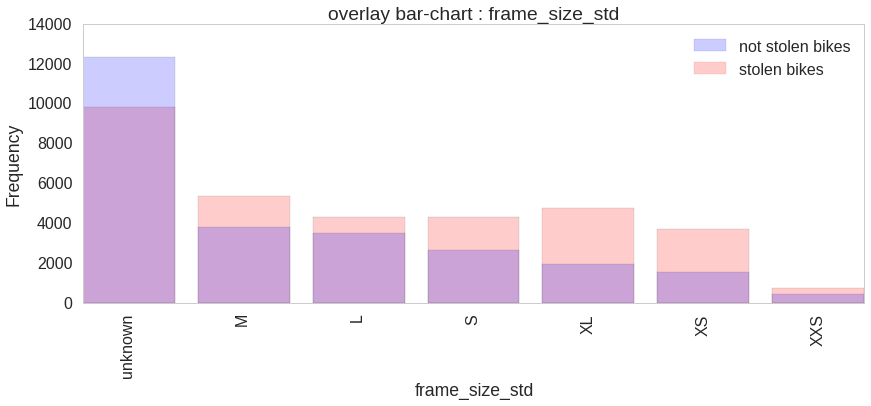

In [31]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'frame_size_std' , 'stolen' , 20 , None)

After standardizing values, it seems that there is an information bias in the data. It seems that frame size column is more populated in the records corresponding to stolen bikes than records corresponding to non-stolen bikes.


In [33]:
print np.unique(df_clean.year)

[  0.   1.   2. ...,  nan  nan  nan]


The year column seems to have multiple representations , occassionally using one or two digits using the four year representation. Other occassions the year column outright contains spurious records. The non-standarized value needs to be cleaned up and records with spurious values for year needs to be deleted

In [34]:
# Cleansing values in year column
rowsToBeDeleted = []

for idx in range(df_clean.shape[0]):
    
    if pd.isnull(df_clean['year'].iloc[idx]) :
        rowsToBeDeleted.append(idx)
        continue
# Some entries had two digit values instead of 4 for year. hence 2000 was added to then if the value was between 0 and 16

    if ( df_clean['year'].iloc[idx] >= 0 and df_clean['year'].iloc[idx] <= 16 )  :
        df_clean['year'].iloc[idx] = 2000 + df_clean['year'].iloc[idx]
        continue
      
    if ( df_clean['year'].iloc[idx] >= 17 and df_clean['year'].iloc[idx] <= 19 ) :
        rowsToBeDeleted.append(idx)
        continue
        
    if ( df_clean['year'].iloc[idx] == 20) :
        df_clean['year'].iloc[idx] = 2000
        continue    
        
    if ( df_clean['year'].iloc[idx] >= 21 and df_clean['year'].iloc[idx] <= 99 ) :
        df_clean['year'].iloc[idx] = 1900 + df_clean['year'].iloc[idx]
        continue 
    
    if ( df_clean['year'].iloc[idx] >= 100 and df_clean['year'].iloc[idx] <= 189 ) :
        rowsToBeDeleted.append(idx)
        continue
        
    if ( df_clean['year'].iloc[idx] >= 190 and df_clean['year'].iloc[idx] <= 200 ) :
        df_clean['year'].iloc[idx] =  df_clean['year'].iloc[idx] * 10
        continue 
        
    if ( df_clean['year'].iloc[idx] >= 201 and df_clean['year'].iloc[idx] <= 1799 ) :
        rowsToBeDeleted.append(idx)
        continue
        
    if ( df_clean['year'].iloc[idx] >= 1800 and df_clean['year'].iloc[idx] <= 2016 ) :
        continue 
    
    if ( df_clean['year'].iloc[idx] >= 18000 and df_clean['year'].iloc[idx] <= 20160 ) :
        df_clean['year'].iloc[idx] =  round( df_clean['year'].iloc[idx] / 10 )
        continue 
        
    rowsToBeDeleted.append(idx)
        
        
print len(rowsToBeDeleted)

df_clean = df_clean.drop(df_clean.index[rowsToBeDeleted])

print df_clean.shape
print np.unique (df_clean['year'])

14610
(45009, 16)
[ 1884.  1885.  1908.  1910.  1920.  1935.  1938.  1940.  1941.  1942.
  1943.  1948.  1950.  1952.  1953.  1954.  1955.  1956.  1957.  1958.
  1959.  1960.  1961.  1962.  1963.  1964.  1965.  1966.  1967.  1968.
  1969.  1970.  1971.  1972.  1973.  1974.  1975.  1976.  1977.  1978.
  1979.  1980.  1981.  1982.  1983.  1984.  1985.  1986.  1987.  1988.
  1989.  1990.  1991.  1992.  1993.  1994.  1995.  1996.  1997.  1998.
  1999.  2000.  2001.  2002.  2003.  2004.  2005.  2006.  2007.  2008.
  2009.  2010.  2011.  2012.  2013.  2014.  2015.  2016.]


/home/anusha/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


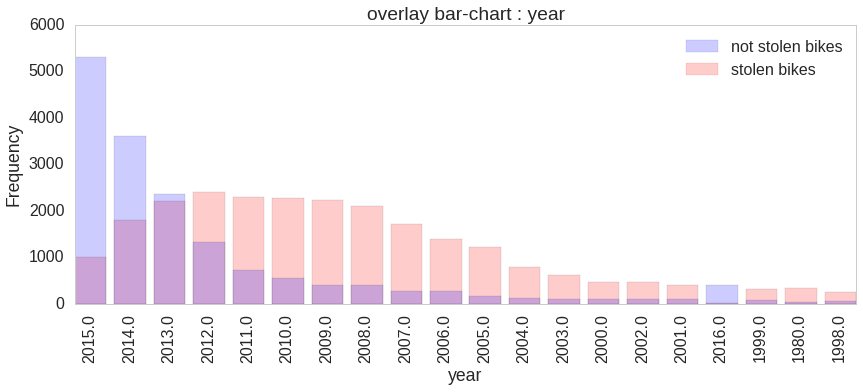

In [35]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'year' , 'stolen' , 20 , None)

The bike model year seems to a significant feature in determining the propensity of bikes to be stolen

Now that, all columns in the dataset are explored and standardized, we shall proceed to convert the categorical variables into indicator columns. We are using DictVectorizer function from sklearn library for this purpose.

In [36]:
# Since Manufacturer id and manufacturer name has the same information, manufactured id was used in the classification model 
# as the manufacturer name has entries with too sparse data. eg: Manufacturer id 47 corresponds to manufacturer "Trek"
columnsIwant =  df_clean[['manufacturer_id','rear_tire_narrow','front_tire_narrow','rear_wheel_size_iso_bsd','front_wheel_size_iso_bsd','handlebar_type_slug','frame_material_slug','front_gear_type_slug','rear_gear_type_slug','frame_size_std','year','stolen']]

In [37]:
columnsIwant.shape

(45009, 12)

In [38]:
# To calculate invalid entries in each feature
columnsIwant.isnull().sum()

manufacturer_id                 0
rear_tire_narrow                0
front_tire_narrow           27847
rear_wheel_size_iso_bsd         0
front_wheel_size_iso_bsd        0
handlebar_type_slug         33596
frame_material_slug         30937
front_gear_type_slug        32486
rear_gear_type_slug         32743
frame_size_std                  0
year                            0
stolen                          0
dtype: int64

In [39]:
# Replace NULLs and Blanks with string missing

def checkMissing(x) :
    if ( pd.isnull(x) or str(x).strip() == ''):
        return 'missing'
    else :
        return x
        
for k in columnsIwant.columns :
    columnsIwant[k] = columnsIwant[k].apply(checkMissing)

columnsIwant.isnull().sum()

/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


manufacturer_id             0
rear_tire_narrow            0
front_tire_narrow           0
rear_wheel_size_iso_bsd     0
front_wheel_size_iso_bsd    0
handlebar_type_slug         0
frame_material_slug         0
front_gear_type_slug        0
rear_gear_type_slug         0
frame_size_std              0
year                        0
stolen                      0
dtype: int64

In [40]:
tempDictionary = columnsIwant.apply(dict , axis = 1)

In [41]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

bikeAttributesDataAll = vec.fit_transform(tempDictionary).toarray()
allColumns = vec.get_feature_names()
print len(allColumns)


# Drop sparsely populated columns from Bike Attributes Data      

x = sum(bikeAttributesDataAll)
selectedColumns = []
selectedColumnsIdx = []

for i in range(len(x)) :
    if x[i] > -1 :
        selectedColumns.append(allColumns[i])
        selectedColumnsIdx.append(i)
        
print len(selectedColumns)
print selectedColumns

bikeAttributesDataSelectedColumns = [ x[selectedColumnsIdx]   for x in bikeAttributesDataAll]

726
726
['frame_material_slug=aluminum', 'frame_material_slug=composite', 'frame_material_slug=missing', 'frame_material_slug=organic', 'frame_material_slug=steel', 'frame_material_slug=titanium', 'frame_size_std=L', 'frame_size_std=M', 'frame_size_std=S', 'frame_size_std=XL', 'frame_size_std=XS', 'frame_size_std=XXS', 'frame_size_std=unknown', 'front_gear_type_slug=1', 'front_gear_type_slug=2', 'front_gear_type_slug=2-internal', 'front_gear_type_slug=3', 'front_gear_type_slug=3-internal', 'front_gear_type_slug=missing', 'front_tire_narrow', 'front_tire_narrow=missing', 'front_wheel_size_iso_bsd=152.0', 'front_wheel_size_iso_bsd=203.0', 'front_wheel_size_iso_bsd=305.0', 'front_wheel_size_iso_bsd=335.0', 'front_wheel_size_iso_bsd=337.0', 'front_wheel_size_iso_bsd=349.0', 'front_wheel_size_iso_bsd=355.0', 'front_wheel_size_iso_bsd=369.0', 'front_wheel_size_iso_bsd=406.0', 'front_wheel_size_iso_bsd=419.0', 'front_wheel_size_iso_bsd=451.0', 'front_wheel_size_iso_bsd=457.0', 'front_wheel_si

In [42]:
# Columns count
print len( bikeAttributesDataAll[0] )
print "The total number of columns: ", len ( bikeAttributesDataSelectedColumns[0])

726
The total number of columns:  726


In [43]:
# Rows Count
print len( bikeAttributesDataAll )
print "The total number of rows: ", len ( bikeAttributesDataSelectedColumns)

45009
The total number of rows:  45009


##Text features analysis

Bike description and paint description are the verbatims available in the dataset.  After reading through some of the descriptions, it became evident that there is clear information bias in the dataset. The bias details are illustrated below

In [44]:
# Extracting length of description columns
def getLength(x):
    return len(str(x))

df_clean['description_len'] = df_clean.description.apply(getLength)
df_clean['paint_description_len'] = df_clean.paint_description.apply(getLength)

df_clean['description_is_missing'] = df_clean.description.apply(pd.isnull)
df_clean['paint_description_is_missing'] = df_clean.paint_description.apply(pd.isnull)

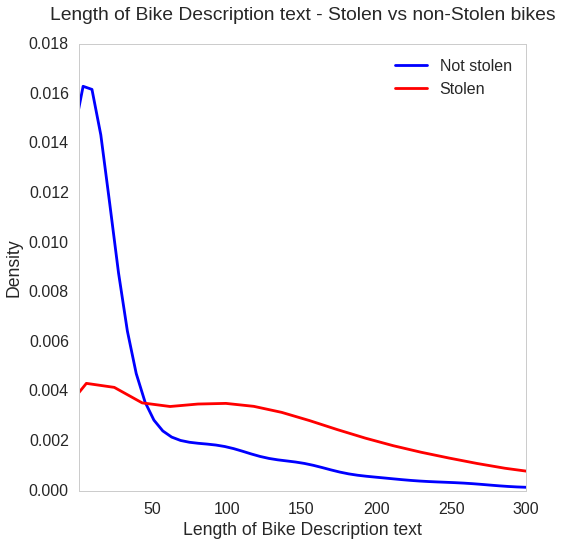

In [45]:
fig, ax = plt.subplots(figsize=(8,8))
colorDict = { True : "r", False :"b"}
for label, df in df_clean['description_len'].groupby(df_clean["stolen"]):
    df.plot(kind="kde", ax=ax, label=label , color = colorDict[label] )
    ax.set_xlim([1 , 300])
plt.legend(["Not stolen" , "Stolen"])
plt.title("Length of Bike Description text - Stolen vs non-Stolen bikes\n")
plt.xlabel("Length of Bike Description text")
plt.grid(False)

It can be from the graph that people who got their bikes stolen tend to write lengthier description of the bikes. This is because they take extra effort to a vivid description to make sure that when someone who has read the description happens to see that bike, he/she is able to identify it. The people who are merely registering their bikes with site, but are in possession of their bikes probably are less inclined in writing a very detailed description of their bikes.

Due to heavy information bias of the column & sparse nature of features obtained out of this column, we decided to leave out this column from the remainder of the analysis

Next we proceed to investigate the paint description verbatims.

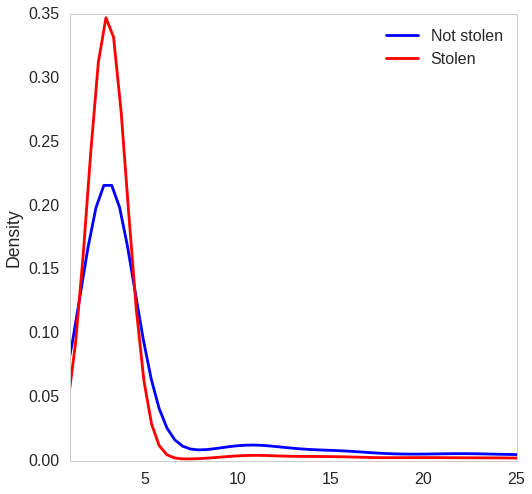

In [115]:
fig, ax = plt.subplots(figsize=(8,8))
colorDict = { True : "r", False :"b"}
for label, df in df_clean['paint_description_len'].groupby(df_clean["stolen"]):
    df.plot(kind="kde", ax=ax, label=label , color = colorDict[label] )
    ax.set_xlim([1 , 25])
plt.legend(["Not stolen" , "Stolen"])
plt.grid(False)

The paint description column has lesser information bias than the description column as seen in the above chart.

Next, we can use standard text processing methods to extract some features out of verbatims of paint descriptions. The following function strips punctuations and special characters from the descriptions, converts the words in the verbatims to lemmas and does filtering on the lemma to keep only the adjectives & the nouns.

In [47]:
from pattern.en import parse
from pattern.en import pprint
from pattern.vector import stem, PORTER, LEMMA
punctuation = list('.,;:!?()[]{}`''\/"@#$^&*+-|=~_')

from sklearn.feature_extraction import text 
stopwords=text.ENGLISH_STOP_WORDS

from nltk.stem.wordnet import WordNetLemmatizer
import nltk
#nltk.download()
lmtzr = WordNetLemmatizer()

import re
import math
regex1=re.compile(r"\.{2,}")
regex2=re.compile(r"\-{2,}")

def get_keywords(thetext):
    if pd.isnull(thetext) :
        return ''
    thetext=re.sub(regex1, ' ', thetext)
    thetext=re.sub(regex2, ' ', thetext)
    keywords=[]
    for i,sentence in enumerate(parse(thetext, tokenize=True, lemmata=True).split()):
        for token in sentence:
            if len(token[4]) >0:
                if token[1] in ['JJ', 'JJR', 'JJS', 'NN', 'NNS','NNP','NNPS']:
                    if (token[4] in stopwords or 
                        token[4][0] in punctuation or 
                        token[4][-1] in punctuation or 
                        len(token[4])== 1):
                        
                        continue
                        
                    tmp = token[4:]
                    # Using a second library for additional lemmatization
                    for i in range(len(tmp)) :
                        tmp[i] = lmtzr.lemmatize(tmp[i])
                    keywords.append( ' '.join(tmp))
    keywordString = ' '.join(keywords)
    return keywordString

print get_keywords("Tan With Light Blue Logo And Stripes")
print get_keywords("Blk/Char/Red")

tan light blue logo stripe
blk char red


The function is then applied on to paint description columns and the result stored in new column

In [48]:
df_clean['paint_description_kw'] = df_clean.paint_description.apply(get_keywords)

Next we use CountVectorizer function from sklearn to transform the verbatims into features. We set a threshold on document frequency to be atleast 50 for a keyword to be treated as a feature input to the model.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=50) ## Minimum document frequency - 50
corpus = df_clean['paint_description_kw'].values

X = vectorizer.fit_transform(corpus)
paintDescKeyWordFeatures = vectorizer.get_feature_names()
print paintDescKeyWordFeatures
paintDescFeaturesData = X.toarray()

# Row Count
print len(paintDescFeaturesData)

# Column count
print len(paintDescFeaturesData[0])

[u'accent', u'black', u'blk', u'blue', u'bright', u'carbon', u'celeste', u'charcoal', u'chrome', u'clear', u'coat', u'color', u'cream', u'crystal', u'cyan', u'dark', u'decal', u'flat', u'fork', u'frame', u'gloss', u'glossy', u'gold', u'gray', u'green', u'grey', u'highlight', u'letter', u'lettering', u'light', u'logo', u'maroon', u'matt', u'matte', u'metallic', u'neon', u'orange', u'paint', u'pearl', u'pink', u'purple', u'red', u'satin', u'seat', u'silver', u'sticker', u'stripe', u'teal', u'trek', u'trim', u'tube', u'white', u'wht', u'yellow']
45009
54


In [50]:
# Following cleansing steps have to be taken and the features calculated again.
# merge black and blk
# merge white and wht
# merge matte and matt
# merge letter and lettering
# merge gray and grey
# ignore the following words as they are too generic - color,flat,fork,frame,highlight,satin,sticker,trek,trim,tube

def cleanKeyWords(paintDesc):
    return paintDesc.replace('blk','black').replace('wht','white').replace('matte','matt').replace('lettering','letter').replace('gray','grey').replace('glossy','gloss')

df_clean['paint_description_kw'] = df_clean.paint_description_kw.apply(cleanKeyWords)

# Re-running count vectorizer after determining words to be ignored from the paint description
ignore_words = ['color' , 'flat' , 'fork' , 'frame' , 'highlight' , 'satin' , 'sticker', 'trek' , 'trim' , 'tube']


vectorizer = CountVectorizer(min_df=50,stop_words = ignore_words) 

X = vectorizer.fit_transform(corpus)
paintDescKeyWordFeatures = vectorizer.get_feature_names()
print paintDescKeyWordFeatures
paintDescFeaturesData = X.toarray()

# Row Count
print len(paintDescFeaturesData)

# Column count
print "The number of features from paint description: ", len(paintDescFeaturesData[0])

#colorsIwant = [u'accent', u'black', u'blk', u'blue', u'bright', u'carbon', u'charcoal', u'chrome', u'clear', u'coat', u'cream', u'crystal', u'cyan', u'dark', u'decal', u'flat', u'fork', u'gloss', u'glossy', u'gold', u'gray', u'green', u'grey', u'letter', u'lettering', u'light', u'logo', u'maroon', u'matte', u'metallic', u'neon', u'orange', u'pearl', u'pink', u'purple', u'red', u'silver', u'stripe', u'teal', u'trim', u'white', u'wht', u'yellow']

[u'accent', u'black', u'blue', u'bright', u'carbon', u'celeste', u'charcoal', u'chrome', u'clear', u'coat', u'cream', u'crystal', u'cyan', u'dark', u'decal', u'gloss', u'gold', u'green', u'grey', u'letter', u'light', u'logo', u'maroon', u'matt', u'metallic', u'neon', u'orange', u'paint', u'pearl', u'pink', u'purple', u'red', u'seat', u'silver', u'stripe', u'teal', u'white', u'yellow']
45009
The number of features from paint description:  38


At the point we completed investigating the entire dataset and have created bike attributes features and text features separately. We now proceed to merge both kinds of features

In [51]:
finalData = np.concatenate((bikeAttributesDataSelectedColumns, paintDescFeaturesData), axis=1)
finalColumns =  selectedColumns + paintDescKeyWordFeatures
print "The final number of rows used in the classification: ", len(finalData) # Rows Count
print "The final number of columns used in the classification: ",len(finalData[0]) # Columns Count

The final number of rows used in the classification:  45009
The final number of columns used in the classification:  764


In [52]:
# Creating a list of features
features = []
for x in finalColumns :
    if x != 'stolen' :
        features.append(x)

In [53]:
# Converting the features + target array into a dataframe
finalDataDF = pd.DataFrame( finalData , columns = finalColumns)

In [54]:
# Checking target column value counts to establish base line accuracy
finalDataDF.stolen.value_counts()

1    27125
0    17884
Name: stolen, dtype: int64

 The baseline accuracy score is thus calculated as ( 27125/(27125+17884)) = 0.60

Next we try and improve the baseline classification accuracy score by deploying classifiers. Towards this we first compute the train and test portions of the dataset. 

In [55]:
# Creating a mask column to separate train and test records

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

itrain, itest = train_test_split(xrange(finalDataDF.shape[0]), train_size=0.7)
mask=np.ones(finalDataDF.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

The following generic functions are used to assist in the model build

In [56]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best


def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

Since our dataset has lots of indicator variables, decision tree and random forest are our intial choice for classifiers. These classifiers were trained by 70% of the dataset and the probability of each bike in the test set getting stolen was predicted. Random forests is known to handle high dimensional datasets well. Another approach we take is using Principal component analysis for dimensionality reduction and using Support vector machines and Logistic regression on the reduced datasets.

Random Forests also allows to determine the important features in predicting Y through a function feature_importances, it can be used for efficient visulaization. 

In [57]:
# Doing parameter search on a Decision tree classifier with Gini criterion

from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier()
parameters = {"max_depth": range(1,10,1)}
clfdt, Xtrain, ytrain, Xtest, ytest  = do_classify(clfdt, parameters, finalDataDF, features, 'stolen', 1, mask=mask)

using mask
BEST {'max_depth': 8} 0.790198692313 [mean: 0.75021, std: 0.03526, params: {'max_depth': 1}, mean: 0.77922, std: 0.07070, params: {'max_depth': 2}, mean: 0.74862, std: 0.03422, params: {'max_depth': 3}, mean: 0.76547, std: 0.03055, params: {'max_depth': 4}, mean: 0.77811, std: 0.04650, params: {'max_depth': 5}, mean: 0.78379, std: 0.05712, params: {'max_depth': 6}, mean: 0.78921, std: 0.05729, params: {'max_depth': 7}, mean: 0.79020, std: 0.05720, params: {'max_depth': 8}, mean: 0.78598, std: 0.05460, params: {'max_depth': 9}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.81
[[4474  944]
 [1670 6415]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [58]:
# Creating a classification report for this decision tree.

from sklearn.metrics import classification_report
print classification_report(ytest,clfdt.predict(Xtest))

             precision    recall  f1-score   support

          0       0.73      0.83      0.77      5418
          1       0.87      0.79      0.83      8085

avg / total       0.81      0.81      0.81     13503



In [59]:
# Changing split criterion to entropy and re-running the decision tree

clfdt_entropy = DecisionTreeClassifier()
parameters = {"criterion": ['entropy'],  "max_depth": range(1,10,1)}
clfdt_entropy, Xtrain, ytrain, Xtest, ytest  = do_classify(clfdt_entropy, parameters, finalDataDF, features, 'stolen', 1, mask=mask)


using mask
BEST {'criterion': 'entropy', 'max_depth': 8} 0.788230813178 [mean: 0.75021, std: 0.03526, params: {'criterion': 'entropy', 'max_depth': 1}, mean: 0.77922, std: 0.07070, params: {'criterion': 'entropy', 'max_depth': 2}, mean: 0.76798, std: 0.04882, params: {'criterion': 'entropy', 'max_depth': 3}, mean: 0.76636, std: 0.02911, params: {'criterion': 'entropy', 'max_depth': 4}, mean: 0.77776, std: 0.04591, params: {'criterion': 'entropy', 'max_depth': 5}, mean: 0.78312, std: 0.05803, params: {'criterion': 'entropy', 'max_depth': 6}, mean: 0.78772, std: 0.05695, params: {'criterion': 'entropy', 'max_depth': 7}, mean: 0.78823, std: 0.05831, params: {'criterion': 'entropy', 'max_depth': 8}, mean: 0.77833, std: 0.04871, params: {'criterion': 'entropy', 'max_depth': 9}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.80
[[4502  916]
 [1785 6300]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [60]:
# Creating a classification report for this decision tree.

from sklearn.metrics import classification_report
print classification_report(ytest,clfdt_entropy.predict(Xtest))

             precision    recall  f1-score   support

          0       0.72      0.83      0.77      5418
          1       0.87      0.78      0.82      8085

avg / total       0.81      0.80      0.80     13503



We get similar performance metrics for both Gini and Entropy split criterion.

The decision tree seems to be doing a good job of identifying the stolen bikes as shown by high precision score. The F1 score which is considered as a trade-off of precision and recall is also higher for the stolen bikes. 

The best fit decision tree has too many nodes to interpret visually. In order to visually examine and interpret the interplay of key factors only, a under-fitted decision tree with 15 nodes only was created.

In [61]:
# Building a decision tree after setting cap on leaf nodes at 15

clfdt_short=DecisionTreeClassifier()

parameters = {"max_leaf_nodes": [15]}
clfdt_short, Xtrain, ytrain, Xtest, ytest  = do_classify(clfdt_short, parameters, finalDataDF, features, 'stolen', 1, mask=mask)

# Exporting tree to GraphViz DOT formant
from sklearn import tree
tree.export_graphviz(clfdt_short, out_file= "tree.dot", feature_names=features)

# Using GraphViz DOT tool to convert tree to .PNG format
import os
out = os.system("dot -Tpng tree.dot -o tree_short.png")

using mask
BEST {'max_leaf_nodes': 15} 0.778327937536 [mean: 0.77833, std: 0.04439, params: {'max_leaf_nodes': 15}]
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.80
[[4595  823]
 [1867 6218]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


As expected , this tree underfits the data. We proceed to create a tree diagram.

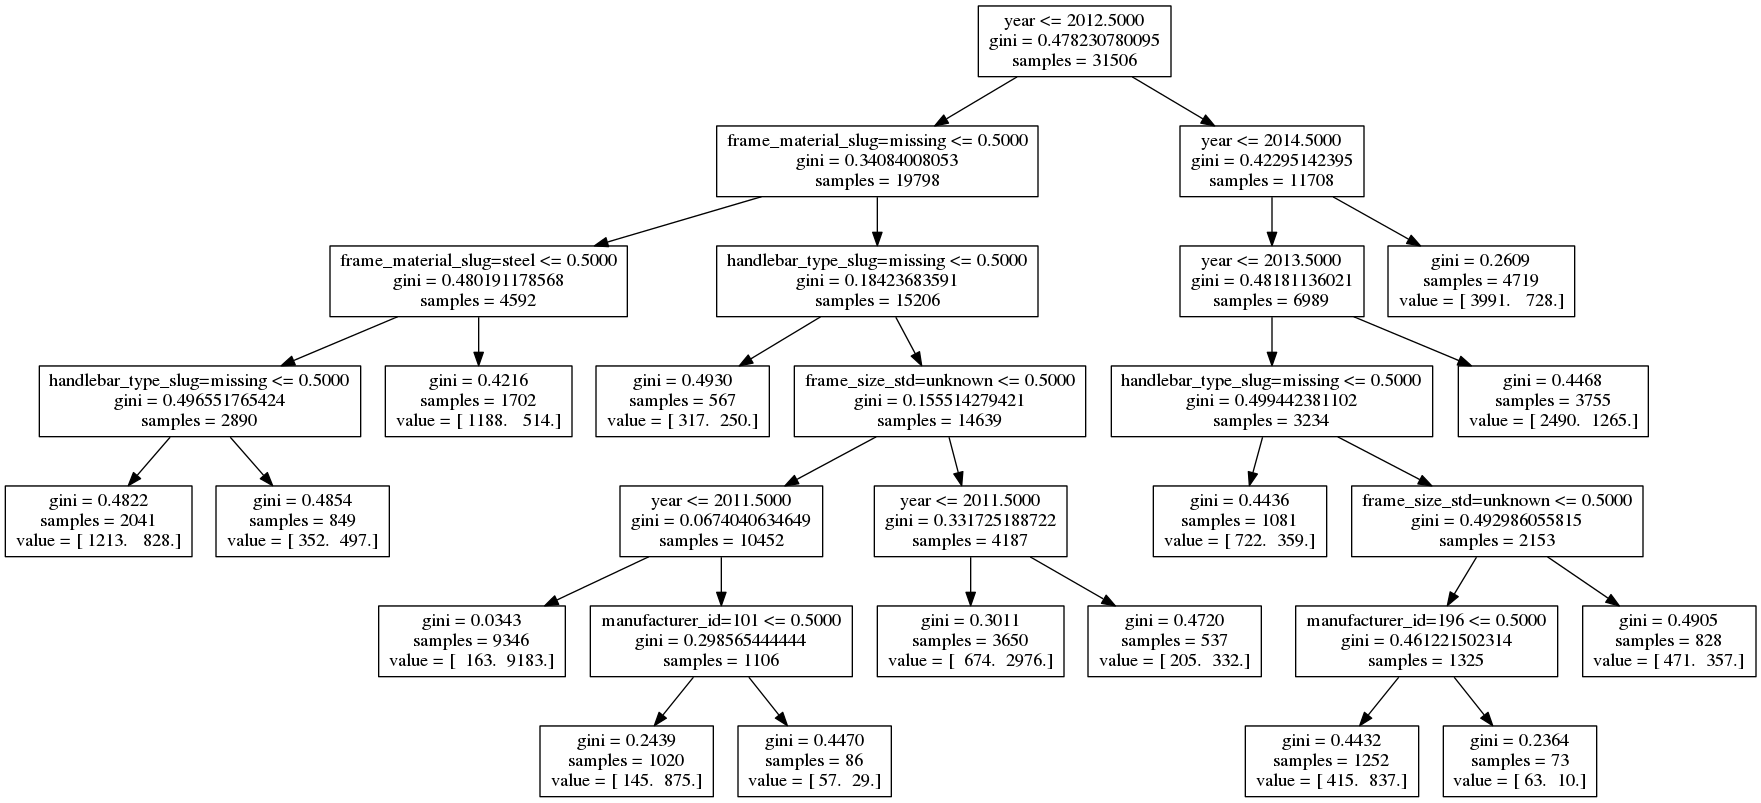

In [62]:
# Displaying decision tree from the prior step
from IPython.display import Image
Image(filename='tree_short.png') 

Next we evaluated the performance of RandomForestClassifier on the same dataset

In [63]:
# Training a random forest classifier ; Coarse search on parameter - number of estimators

from sklearn.ensemble import RandomForestClassifier
clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 101, 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 71} 0.791214371866 [mean: 0.75528, std: 0.04066, params: {'n_estimators': 1}, mean: 0.78236, std: 0.05525, params: {'n_estimators': 6}, mean: 0.78249, std: 0.04948, params: {'n_estimators': 11}, mean: 0.78725, std: 0.05547, params: {'n_estimators': 16}, mean: 0.78785, std: 0.05224, params: {'n_estimators': 21}, mean: 0.78969, std: 0.05400, params: {'n_estimators': 26}, mean: 0.78845, std: 0.05177, params: {'n_estimators': 31}, mean: 0.78893, std: 0.05328, params: {'n_estimators': 36}, mean: 0.78842, std: 0.05188, params: {'n_estimators': 41}, mean: 0.79061, std: 0.05221, params: {'n_estimators': 46}, mean: 0.78944, std: 0.05203, params: {'n_estimators': 51}, mean: 0.79052, std: 0.05274, params: {'n_estimators': 56}, mean: 0.79045, std: 0.05174, params: {'n_estimators': 61}, mean: 0.78991, std: 0.05252, params: {'n_estimators': 66}, mean: 0.79121, std: 0.05238, params: {'n_estimators': 71}, mean: 0.79061, std: 0.05425, params: {'n_estimators': 76}, mean: 0.79052, s

In [64]:
best_estimator_count = clfForest.get_params()['n_estimators']
print best_estimator_count

71


In [65]:
print classification_report(ytest,clfForest.predict(Xtest))

             precision    recall  f1-score   support

          0       0.73      0.80      0.76      5418
          1       0.86      0.80      0.83      8085

avg / total       0.80      0.80      0.80     13503



The model from coarse search on number of estimators parameter already seems to be doing a notch better than decision tree. Next we optimize the Random Forest for max_depth

In [66]:
# Continuing coarse search after additon of max_depth parameter to the search

parameters = {"n_estimators": range(best_estimator_count -6, best_estimator_count+7, 3) , "max_depth" : range ( 1, 49 , 5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 77, 'max_depth': 31} 0.797911508919 [mean: 0.60423, std: 0.00043, params: {'n_estimators': 65, 'max_depth': 1}, mean: 0.60436, std: 0.00056, params: {'n_estimators': 68, 'max_depth': 1}, mean: 0.60503, std: 0.00195, params: {'n_estimators': 71, 'max_depth': 1}, mean: 0.60588, std: 0.00181, params: {'n_estimators': 74, 'max_depth': 1}, mean: 0.60538, std: 0.00130, params: {'n_estimators': 77, 'max_depth': 1}, mean: 0.69714, std: 0.05246, params: {'n_estimators': 65, 'max_depth': 6}, mean: 0.69844, std: 0.05540, params: {'n_estimators': 68, 'max_depth': 6}, mean: 0.69879, std: 0.05450, params: {'n_estimators': 71, 'max_depth': 6}, mean: 0.69945, std: 0.05566, params: {'n_estimators': 74, 'max_depth': 6}, mean: 0.69898, std: 0.05596, params: {'n_estimators': 77, 'max_depth': 6}, mean: 0.72818, std: 0.06338, params: {'n_estimators': 65, 'max_depth': 11}, mean: 0.72066, std: 0.06735, params: {'n_estimators': 68, 'max_depth': 11}, mean: 0.72808, std: 0.07398, params: {'

In [67]:
best_estimator_count = clfForest.get_params()['n_estimators']
best_max_depth = clfForest.get_params()['max_depth']

print best_estimator_count , best_max_depth

77 31


In [68]:
print classification_report(ytest,clfForest.predict(Xtest))

             precision    recall  f1-score   support

          0       0.74      0.82      0.78      5418
          1       0.87      0.81      0.84      8085

avg / total       0.82      0.81      0.81     13503



In [69]:
# Continuing coarse search after addition of min_samples_split parameter

parameters = {"n_estimators":  range(best_estimator_count-4, best_estimator_count+4, 3) , 
              "max_depth" : range(best_max_depth-4, best_max_depth+4, 3) ,
              "min_samples_split": range(15,100,5)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'min_samples_split': 15, 'n_estimators': 73, 'max_depth': 33} 0.796895829366 [mean: 0.79359, std: 0.05817, params: {'min_samples_split': 15, 'n_estimators': 73, 'max_depth': 27}, mean: 0.79315, std: 0.05811, params: {'min_samples_split': 15, 'n_estimators': 76, 'max_depth': 27}, mean: 0.79375, std: 0.05760, params: {'min_samples_split': 15, 'n_estimators': 79, 'max_depth': 27}, mean: 0.79280, std: 0.05863, params: {'min_samples_split': 20, 'n_estimators': 73, 'max_depth': 27}, mean: 0.79286, std: 0.05790, params: {'min_samples_split': 20, 'n_estimators': 76, 'max_depth': 27}, mean: 0.79382, std: 0.05811, params: {'min_samples_split': 20, 'n_estimators': 79, 'max_depth': 27}, mean: 0.79077, std: 0.05924, params: {'min_samples_split': 25, 'n_estimators': 73, 'max_depth': 27}, mean: 0.79118, std: 0.05880, params: {'min_samples_split': 25, 'n_estimators': 76, 'max_depth': 27}, mean: 0.78979, std: 0.05867, params: {'min_samples_split': 25, 'n_estimators': 79, 'max_depth': 27}, mean: 0

In [70]:
best_estimator_count = clfForest.get_params()['n_estimators']
best_max_depth = clfForest.get_params()['max_depth']
best_min_samples_split = clfForest.get_params()['min_samples_split']

print best_estimator_count , best_max_depth , best_min_samples_split

73 33 15


In [71]:
# Fine search to find the best parameters
parameters = {"n_estimators":  range(best_estimator_count-2, best_estimator_count+3, 1) , 
              "max_depth" : range(best_max_depth-2, best_max_depth+3, 1) ,
              "min_samples_split": range(best_min_samples_split-2, best_min_samples_split+3, 1)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       finalDataDF, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'min_samples_split': 15, 'n_estimators': 74, 'max_depth': 34} 0.798958928458 [mean: 0.79537, std: 0.05911, params: {'min_samples_split': 13, 'n_estimators': 71, 'max_depth': 31}, mean: 0.79556, std: 0.05913, params: {'min_samples_split': 13, 'n_estimators': 72, 'max_depth': 31}, mean: 0.79531, std: 0.05982, params: {'min_samples_split': 13, 'n_estimators': 73, 'max_depth': 31}, mean: 0.79550, std: 0.06005, params: {'min_samples_split': 13, 'n_estimators': 74, 'max_depth': 31}, mean: 0.79528, std: 0.05977, params: {'min_samples_split': 13, 'n_estimators': 75, 'max_depth': 31}, mean: 0.79474, std: 0.06015, params: {'min_samples_split': 14, 'n_estimators': 71, 'max_depth': 31}, mean: 0.79851, std: 0.06137, params: {'min_samples_split': 14, 'n_estimators': 72, 'max_depth': 31}, mean: 0.79839, std: 0.06213, params: {'min_samples_split': 14, 'n_estimators': 73, 'max_depth': 31}, mean: 0.79804, std: 0.06145, params: {'min_samples_split': 14, 'n_estimators': 74, 'max_depth': 31}, mean: 0

In [72]:
# Performance metrics of the best fit Random Forest
print classification_report(ytest,clfForest.predict(Xtest))

             precision    recall  f1-score   support

          0       0.73      0.84      0.78      5418
          1       0.88      0.80      0.84      8085

avg / total       0.82      0.81      0.81     13503



In [73]:
# Printing metrics for Decision Tree for comparison purposes

from sklearn.metrics import classification_report
print classification_report(ytest,clfdt_entropy.predict(Xtest))

             precision    recall  f1-score   support

          0       0.72      0.83      0.77      5418
          1       0.87      0.78      0.82      8085

avg / total       0.81      0.80      0.80     13503



The hyperparameter search is now complete and the optimal parameters for n_estimators, max_depth, and min_samples_split were found. Random Forest improves over Decision Tree on all metrics being evaluated. The accuracy score of test set seems very promising to classify whether a bike is stolen or not given its features


Let us now procced to investigate significant features of this model to get some insight into factors contributing to the theft 
of the model

In [74]:
# Extracting Top 25 significant features from the best fit Random forest

signi_features = zip(features, clfForest.feature_importances_)
signi_features = pd.DataFrame(signi_features, columns = ["features", "importance"])
signi_features.sort(columns = ["importance"], ascending = False, inplace = True)
print "Top 25 significant features"
print signi_features.head(30)

Top 25 significant features
                           features  importance
724                            year    0.314584
12           frame_size_std=unknown    0.054666
2       frame_material_slug=missing    0.053487
52      handlebar_type_slug=missing    0.038330
697     rear_gear_type_slug=missing    0.029930
4         frame_material_slug=steel    0.028822
18     front_gear_type_slug=missing    0.028644
49         handlebar_type_slug=drop    0.019236
723     rear_wheel_size_iso_bsd=nan    0.019222
0      frame_material_slug=aluminum    0.019039
20        front_tire_narrow=missing    0.014520
44   front_wheel_size_iso_bsd=622.0    0.011489
9                 frame_size_std=XL    0.011265
50         handlebar_type_slug=flat    0.011078
47     front_wheel_size_iso_bsd=nan    0.010550
726                           black    0.010485
720   rear_wheel_size_iso_bsd=622.0    0.009998
533              manufacturer_id=47    0.009349
19                front_tire_narrow    0.009299
16          

/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


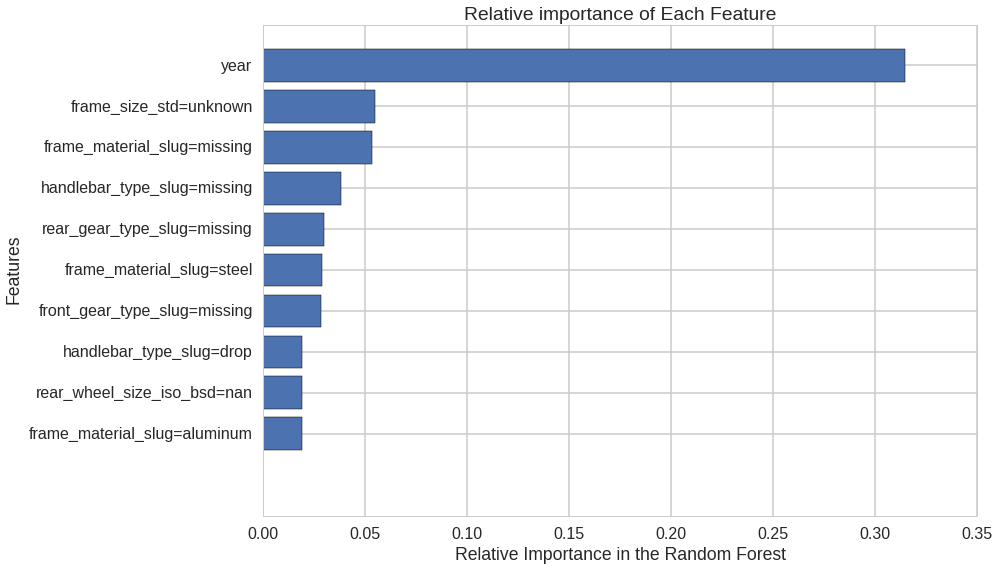

In [75]:
# Create plot of Top 10 significant factors using feature importances

importance_list = clfForest.feature_importances_
name_list = features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

The attribute of the random forest feature_importances was used to obtain the relative importance of the features. The manufacturing year of the bike, whether the bike is expensive or not, and the frame size seemed to have an important role in classifying stolen from the non-stolen ones as seen in the bar graph above.

The model year of the bike seems way more significant than expected in determining whether bike gets stolen. That too bikes older than 2013 seems to have a high propensity to gets stolen.

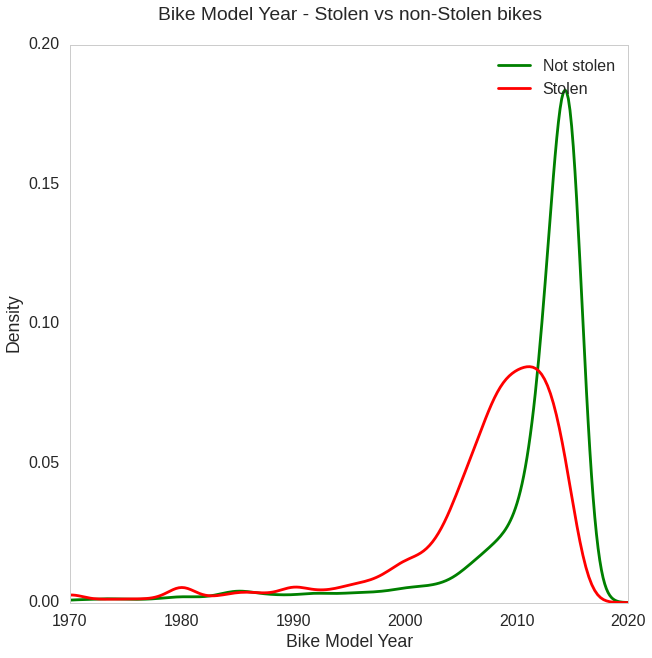

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
colorDict = { True : "r", False :"g"}
for label, df in finalDataDF['year'].groupby(finalDataDF["stolen"]):
    df.plot(kind="kde", ax=ax, label=label , color = colorDict[label] )
    ax.set_xlim([1970 , 2020])
plt.legend(["Not stolen" , "Stolen"])
plt.title("Bike Model Year - Stolen vs non-Stolen bikes\n")
plt.xlabel("Bike Model Year")
plt.grid(False)

After evaluating multiple possibilities, we found out the best explanation of this phenomenon from the history of bikeIndex.org website. Following is an excerpt from the about page of bikeindex.org

"Bryan started StolenBicycleRegistry.com in 2004 because he was tired of having bikes stolen. Seth started the Bike Index because he was a bike mechanic and wished there was an easy way to register bikes for his customers. We merged Bike Index and SBR in July of 2014 because it made perfect sense—Seth makes sure registration is effortless, and Bryan recovers stolen bikes."

Apparently the site bikeindex.org as we know it today is the merger of StolenBicycleRegistry.com & bikeindex.org in the year of 2014.  Both sites served a different purposes before 2014 and thus can be reasonably expected to have different growth trajectories. It seems StolenBicycleRegistry, primarily used to recover stolen bikes had a faster growth than bikeindex.org, but the proportion of stolen bikes to non-stolen bikes have droppped since.

We can expect the imbalance of years prior to 2014 to stay as is or probably widen as we expect long time bike owners to make use of the site only if their bike ever gets stolen. It seems like BikeIndex.org could use some marketing to widen it's user base among long time bike owners as most long time bike owners are probably not aware of the site. The new bike owners can be expected to have been advised by the bike shops to register their bike with BikeIndex.org

We shall proceed to understand the extend of this bias, but before we wanted to see if RandomForest gives best performance metrics or if another algorithm is able to best these numbers. We have chosen to try LogisticRegression and SVC as the challengers.

LogisticRegression and SVC are difficult to be readily run against current dataset. Due to it's high dimensional nature. In order to run these algorithms, we first reduce the dataset to it's principal components.

In [77]:
from sklearn.decomposition import PCA

componentsCount = 20
pca = PCA(n_components=componentsCount)

data_PCA = pca.fit_transform(finalDataDF[features])
columns_PCA = [ x[0] + "_" + x[1] for x in zip( ['pca'] * componentsCount , [ str(i) for i in range(componentsCount)])] 

final_PCA = pd.DataFrame ( data_PCA , columns = columns_PCA)
final_PCA['stolen'] = finalDataDF['stolen']

Next, we proceed to run Logistic Regression on the reduced dataset

In [78]:
from sklearn.linear_model import LogisticRegression
clflog,X_train,y_train,X_test,y_test  = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, final_PCA, columns_PCA, u'stolen', 1, mask=mask)

using mask
BEST {'C': 100} 0.742271313401 [mean: 0.69438, std: 0.07587, params: {'C': 0.001}, mean: 0.73783, std: 0.05433, params: {'C': 0.01}, mean: 0.74186, std: 0.04931, params: {'C': 0.1}, mean: 0.74211, std: 0.04988, params: {'C': 1}, mean: 0.74224, std: 0.04977, params: {'C': 10}, mean: 0.74227, std: 0.04979, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.75
Accuracy on test data:     0.75
[[3480 1938]
 [1491 6594]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [79]:
print classification_report(y_test,clflog.predict(X_test))

             precision    recall  f1-score   support

          0       0.70      0.64      0.67      5418
          1       0.77      0.82      0.79      8085

avg / total       0.74      0.75      0.74     13503



Logistic regression did not improve over the performance metrics of the RandomForest model. Next we attempt running SVC for this classification task

In [80]:
from sklearn.svm import LinearSVC
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=final_PCA[columns_PCA].values
Yresp=final_PCA['stolen'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

from sklearn.grid_search import GridSearchCV
gs=GridSearchCV(clfsvm, param_grid={'C':Cs}, cv=5)
gs.fit(Xmatrix_train, Yresp_train)
print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_

best = gs.best_estimator_
best.fit(Xmatrix_train, Yresp_train)
best.score(Xmatrix_test, Yresp_test)

clfsvm, X_train, y_train, X_test, y_test = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, final_PCA, columns_PCA, u'stolen', 1, mask=mask)

BEST {'C': 10.0} 0.733384117311 [mean: 0.70114, std: 0.06037, params: {'C': 0.001}, mean: 0.71659, std: 0.05748, params: {'C': 0.01}, mean: 0.72129, std: 0.05461, params: {'C': 0.1}, mean: 0.71843, std: 0.05795, params: {'C': 1.0}, mean: 0.73338, std: 0.06251, params: {'C': 10.0}, mean: 0.69891, std: 0.09231, params: {'C': 100.0}]
using mask
BEST {'C': 10.0} 0.731321018219 [mean: 0.70114, std: 0.06037, params: {'C': 0.001}, mean: 0.71494, std: 0.05744, params: {'C': 0.01}, mean: 0.72113, std: 0.05457, params: {'C': 0.1}, mean: 0.71847, std: 0.05533, params: {'C': 1.0}, mean: 0.73132, std: 0.05277, params: {'C': 10.0}, mean: 0.71104, std: 0.07899, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.75
Accuracy on test data:     0.75
[[3615 1803]
 [1565 6520]]
########################################################


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [81]:
print classification_report(y_test,clfsvm.predict(X_test))

             precision    recall  f1-score   support

          0       0.70      0.67      0.68      5418
          1       0.78      0.81      0.79      8085

avg / total       0.75      0.75      0.75     13503



SVC performance is sub-par to RandomForests as well

Next we procced to investigate the ROC curves of all the four classifiers we have fitted.

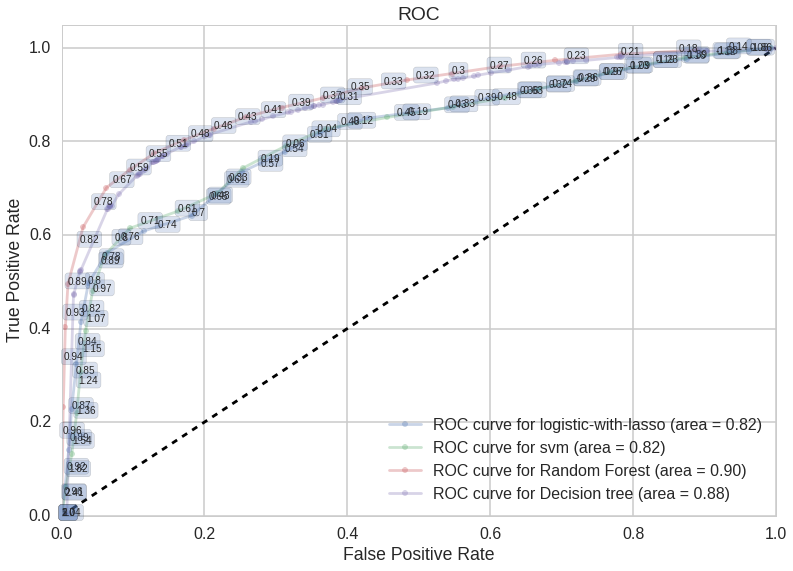

In [82]:
ax = make_roc("logistic-with-lasso",clflog, y_test, X_test, None, labe=300, skip=400)
make_roc("svm",clfsvm, y_test, X_test, ax, labe=300, proba=False, skip=400);
make_roc("Random Forest",clfForest, ytest, Xtest, ax, labe=300, skip=400);
make_roc("Decision tree",clfdt, ytest, Xtest, ax, labe=60)

As expected , RandomForest gives the best ROC curve characterisitics when compared with other classifiers

We now revisit the year bias issue identified earlier. To understand what the feature importances would look like if the dataset was balanced across the bike model years, we proceed to create a balanced dataset by means of over-sampling/under-sampling proportions of stolen bikes to non-stolen bikes across the years. Let us first determine what the ratio of stolen bikes to total bikes should look like across the years.

In [83]:
# Determining ratio of stolen bikes to non-stolen Bikes for the overall sample
finalDataDF.stolen.value_counts()

1    27125
0    17884
Name: stolen, dtype: int64

In [84]:
print "ratio = " , str( (27125 * 1.0) / (27125 + 17884))

ratio =  0.602657246329


Goal here is get the proportion of stolen bikes to all bikes in every Bike Model Year at near 0.60. We do this by determining first, for each year which category - stolen or non-stolen bikes needs to be over-sampled or under-sampled to achieve this ratio. Also we need to determine, how much to oversample or undersample based on proportions of data already present. Preference is given to over-sampling than under-sampling to balance the dataset as this ensures minimal loss of useful information.

We shall perform under-sampling of stolen/non-stolen segment in cases where over-sampling of the complementary segment could be causing too much duplication of information. We arbitrarily fix over-sampling ratio threshold at 80% . If we need to over-sample beyond 80% of the data falling short desired proportion, we shall choose the under-sample the complementary segment instead to balance the ratio of stolen bikes to total bikes in that year at 0.60. Also, we shall ignore any year which has less than 100 records in total to reduce noisy data.

In [85]:
# Oversampling / Under-sampling across years to balance the ratio

balanceRatio =  0.602657246329
samplingRatioDict = {}
finalDFBalanced = None
for year in np.unique (finalDataDF.year) :
    recordsCount = len(np.where(finalDataDF['year'] == year)[0])
    stolenDetails = dict (  finalDataDF.iloc[ np.where(finalDataDF['year'] == year)]['stolen'].value_counts())
    
    # Perform balancing only for years with 100 or more records.
    if recordsCount >= 100 :
        ratioInThatYear = ( stolenDetails[1] * 1.0 / (stolenDetails[1] + stolenDetails[0]) )
        
        # Determining which segment to oversample or under sample.
        if ratioInThatYear > balanceRatio :
            portionToBeOverSampled = 'stolen_False'
            portionToBeUnderSampled = 'stolen_True'
           
            overSampleRatio = (( 1 - balanceRatio ) / (1 -ratioInThatYear ))*(ratioInThatYear/balanceRatio)
            underSampleRatio =  1.0 / overSampleRatio
        else :
            portionToBeOverSampled = 'stolen_True'
            portionToBeUnderSampled = 'stolen_False'
            
            underSampleRatio  = (( 1 - balanceRatio ) / (1 -ratioInThatYear ))*(ratioInThatYear/balanceRatio)
            overSampleRatio =  1.0 / underSampleRatio
                    
        tempDF = finalDataDF.iloc[ np.where(finalDataDF['year'] == year)]

        # Perform over-sampling or under-sampling as per the choice above.
        print "Ratio of Stolen Bikes to Total" , year , ( stolenDetails[1] * 1.0 / (stolenDetails[1] + stolenDetails[0]) )
        if overSampleRatio <= 0.8 :
            print "Column to OverSampled " , portionToBeOverSampled
            print "OverSampleRatio" , overSampleRatio
            
            if portionToBeOverSampled == 'stolen_False' :
                print "oversampling stolen_False" , overSampleRatio
                retainedPortion = tempDF.copy()
                overSampledPortion = retainedPortion.iloc[np.where(retainedPortion['stolen'] == False)].sample( frac = overSampleRatio , replace = True , axis = 0)
                retainedPortion = pd.concat ([retainedPortion ,overSampledPortion] )
            else :
                print "oversampling stolen_True" , overSampleRatio
                retainedPortion = tempDF.copy()
                overSampledPortion = retainedPortion.iloc[np.where(retainedPortion['stolen'] == True)].sample( frac = overSampleRatio , replace = True ,  axis = 0)
                retainedPortion = pd.concat ([retainedPortion ,overSampledPortion] )
  
            
        else :
            if portionToBeUnderSampled == 'stolen_False' :
                print "undersampling stolen_False" , underSampleRatio
                retainedPortion = tempDF.iloc[np.where(tempDF['stolen'] == True)]
                underSampledPortion = tempDF.iloc[np.where(tempDF['stolen'] == False)].sample( frac = underSampleRatio , replace = True  , axis = 0)
                retainedPortion = pd.concat ([retainedPortion ,underSampledPortion] )

            else :
                print "undersampling stolen_True" , underSampleRatio
                retainedPortion = tempDF.iloc[np.where(tempDF['stolen'] == False)]
                print tempDF.iloc[np.where(tempDF['stolen'] == True)].shape
                
                underSampledPortion = tempDF.iloc[np.where(tempDF['stolen'] == True)].sample( frac = underSampleRatio , replace = True , axis = 0)
                print underSampledPortion.shape
                retainedPortion = pd.concat ([retainedPortion ,underSampledPortion] )

        if finalDFBalanced is None :
            finalDFBalanced = retainedPortion.copy()
        else :
            finalDFBalanced = pd.concat([finalDFBalanced , retainedPortion])
    else :
        print "Skipping year " + str(year) + " as there are less 100 records in the dataset"
        

Skipping year 1884.0 as there are less 100 records in the dataset
Skipping year 1885.0 as there are less 100 records in the dataset
Skipping year 1908.0 as there are less 100 records in the dataset
Skipping year 1910.0 as there are less 100 records in the dataset
Skipping year 1920.0 as there are less 100 records in the dataset
Skipping year 1935.0 as there are less 100 records in the dataset
Skipping year 1938.0 as there are less 100 records in the dataset
Skipping year 1940.0 as there are less 100 records in the dataset
Skipping year 1941.0 as there are less 100 records in the dataset
Skipping year 1942.0 as there are less 100 records in the dataset
Skipping year 1943.0 as there are less 100 records in the dataset
Skipping year 1948.0 as there are less 100 records in the dataset
Skipping year 1950.0 as there are less 100 records in the dataset
Skipping year 1952.0 as there are less 100 records in the dataset
Skipping year 1953.0 as there are less 100 records in the dataset
Skipping y

Let us create a density plot and ensure that the data is now balanced.

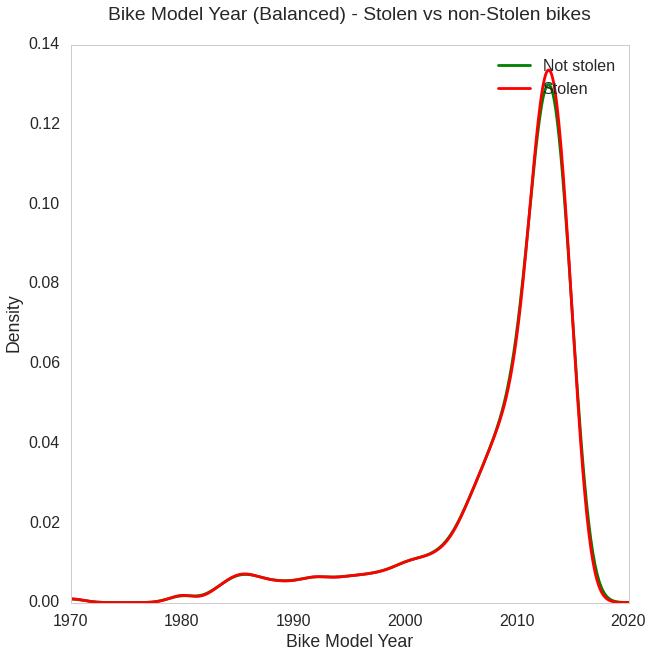

In [86]:
fig, ax = plt.subplots(figsize=(10,10))
colorDict = { True : "r", False :"g"}
for label, df in finalDFBalanced['year'].groupby(finalDFBalanced["stolen"]):
    df.plot(kind="kde", ax=ax, label=label , color = colorDict[label] )
    ax.set_xlim([1970 , 2020])
plt.legend(["Not stolen" , "Stolen"])
plt.title("Bike Model Year (Balanced) - Stolen vs non-Stolen bikes\n")
plt.xlabel("Bike Model Year")
plt.grid(False)

In [87]:
finalDFBalanced.shape

(23083, 764)

Now proceeding to create train & test portions on this balanced dataset

In [88]:
# Creating a mask column to separate train and test records

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

itrain, itest = train_test_split(xrange(finalDFBalanced.shape[0]), train_size=0.7)
mask=np.ones(finalDFBalanced.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [89]:
clfForest_balanced = RandomForestClassifier()
parameters = {"n_estimators": range(1, 101, 5)}
clfForest_balanced, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(clfForest_balanced, parameters, 
                                                       finalDFBalanced, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 86} 0.719829186781 [mean: 0.68133, std: 0.08385, params: {'n_estimators': 1}, mean: 0.69934, std: 0.10665, params: {'n_estimators': 6}, mean: 0.70708, std: 0.09737, params: {'n_estimators': 11}, mean: 0.71017, std: 0.10364, params: {'n_estimators': 16}, mean: 0.71352, std: 0.09457, params: {'n_estimators': 21}, mean: 0.71104, std: 0.10010, params: {'n_estimators': 26}, mean: 0.71315, std: 0.09648, params: {'n_estimators': 31}, mean: 0.71110, std: 0.09809, params: {'n_estimators': 36}, mean: 0.71407, std: 0.09798, params: {'n_estimators': 41}, mean: 0.71494, std: 0.10032, params: {'n_estimators': 46}, mean: 0.71333, std: 0.10071, params: {'n_estimators': 51}, mean: 0.71451, std: 0.09967, params: {'n_estimators': 56}, mean: 0.71544, std: 0.10195, params: {'n_estimators': 61}, mean: 0.71735, std: 0.10054, params: {'n_estimators': 66}, mean: 0.71717, std: 0.10221, params: {'n_estimators': 71}, mean: 0.71661, std: 0.10595, params: {'n_estimators': 76}, mean: 0.71785, s

In [90]:
best_estimator_count = clfForest_balanced.get_params()['n_estimators']
print best_estimator_count

86


In [91]:
# Continuing coarse search after additon of max_depth parameter to the search

parameters = {"n_estimators": range(best_estimator_count -6, best_estimator_count+7, 3) , "max_depth" : range ( 1, 49 , 5)}
clfForest_balanced, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(clfForest_balanced, parameters, 
                                                       finalDFBalanced, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 86, 'max_depth': 36} 0.723851961876 [mean: 0.60007, std: 0.00282, params: {'n_estimators': 80, 'max_depth': 1}, mean: 0.59902, std: 0.00493, params: {'n_estimators': 83, 'max_depth': 1}, mean: 0.59976, std: 0.00344, params: {'n_estimators': 86, 'max_depth': 1}, mean: 0.60082, std: 0.00134, params: {'n_estimators': 89, 'max_depth': 1}, mean: 0.60119, std: 0.00059, params: {'n_estimators': 92, 'max_depth': 1}, mean: 0.68393, std: 0.10820, params: {'n_estimators': 80, 'max_depth': 6}, mean: 0.68721, std: 0.10606, params: {'n_estimators': 83, 'max_depth': 6}, mean: 0.68684, std: 0.10496, params: {'n_estimators': 86, 'max_depth': 6}, mean: 0.68635, std: 0.10565, params: {'n_estimators': 89, 'max_depth': 6}, mean: 0.68728, std: 0.10457, params: {'n_estimators': 92, 'max_depth': 6}, mean: 0.69514, std: 0.11534, params: {'n_estimators': 80, 'max_depth': 11}, mean: 0.69483, std: 0.11643, params: {'n_estimators': 83, 'max_depth': 11}, mean: 0.69619, std: 0.11223, params: {'

In [92]:
best_estimator_count = clfForest_balanced.get_params()['n_estimators']
best_max_depth = clfForest_balanced.get_params()['max_depth']

print best_estimator_count , best_max_depth

86 36


In [93]:
# Continuing coarse search after addition of min_samples_split parameter

parameters = {"n_estimators":  range(best_estimator_count-4, best_estimator_count+4, 3) , 
              "max_depth" : range(best_max_depth-4, best_max_depth+4, 3) ,
              "min_samples_split": range(15,100,5)}
clfForest_balanced, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(clfForest_balanced, parameters, 
                                                       finalDFBalanced, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'min_samples_split': 15, 'n_estimators': 82, 'max_depth': 38} 0.719767297933 [mean: 0.71321, std: 0.12071, params: {'min_samples_split': 15, 'n_estimators': 82, 'max_depth': 32}, mean: 0.71271, std: 0.12033, params: {'min_samples_split': 15, 'n_estimators': 85, 'max_depth': 32}, mean: 0.71271, std: 0.11993, params: {'min_samples_split': 15, 'n_estimators': 88, 'max_depth': 32}, mean: 0.71587, std: 0.11868, params: {'min_samples_split': 20, 'n_estimators': 82, 'max_depth': 32}, mean: 0.71513, std: 0.11883, params: {'min_samples_split': 20, 'n_estimators': 85, 'max_depth': 32}, mean: 0.71568, std: 0.11936, params: {'min_samples_split': 20, 'n_estimators': 88, 'max_depth': 32}, mean: 0.71717, std: 0.12058, params: {'min_samples_split': 25, 'n_estimators': 82, 'max_depth': 32}, mean: 0.71772, std: 0.12021, params: {'min_samples_split': 25, 'n_estimators': 85, 'max_depth': 32}, mean: 0.71729, std: 0.12152, params: {'min_samples_split': 25, 'n_estimators': 88, 'max_depth': 32}, mean: 0

In [94]:
best_estimator_count = clfForest_balanced.get_params()['n_estimators']
best_max_depth = clfForest_balanced.get_params()['max_depth']
best_min_samples_split = clfForest_balanced.get_params()['min_samples_split']

print best_estimator_count , best_max_depth , best_min_samples_split

82 38 15


In [95]:
# Fine search to find the best parameters
parameters = {"n_estimators":  range(best_estimator_count-2, best_estimator_count+3, 1) , 
              "max_depth" : range(best_max_depth-2, best_max_depth+3, 1) ,
              "min_samples_split": range(best_min_samples_split-2, best_min_samples_split+3, 1)}
clfForest_balanced, Xtrain1, ytrain1, Xtest1, ytest1 = do_classify(clfForest_balanced, parameters, 
                                                       finalDFBalanced, features, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'min_samples_split': 14, 'n_estimators': 80, 'max_depth': 40} 0.721066963733 [mean: 0.71414, std: 0.11763, params: {'min_samples_split': 13, 'n_estimators': 80, 'max_depth': 36}, mean: 0.71383, std: 0.11744, params: {'min_samples_split': 13, 'n_estimators': 81, 'max_depth': 36}, mean: 0.71426, std: 0.11794, params: {'min_samples_split': 13, 'n_estimators': 82, 'max_depth': 36}, mean: 0.71537, std: 0.11715, params: {'min_samples_split': 13, 'n_estimators': 83, 'max_depth': 36}, mean: 0.71531, std: 0.11819, params: {'min_samples_split': 13, 'n_estimators': 84, 'max_depth': 36}, mean: 0.71432, std: 0.11993, params: {'min_samples_split': 14, 'n_estimators': 80, 'max_depth': 36}, mean: 0.71841, std: 0.11676, params: {'min_samples_split': 14, 'n_estimators': 81, 'max_depth': 36}, mean: 0.71865, std: 0.11711, params: {'min_samples_split': 14, 'n_estimators': 82, 'max_depth': 36}, mean: 0.71878, std: 0.11674, params: {'min_samples_split': 14, 'n_estimators': 83, 'max_depth': 36}, mean: 0

Let us now proceed to print the Top 10 significant features from this model fitted against balanced dataset and compare them against the ones from unbalanced dataset.

/home/anusha/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


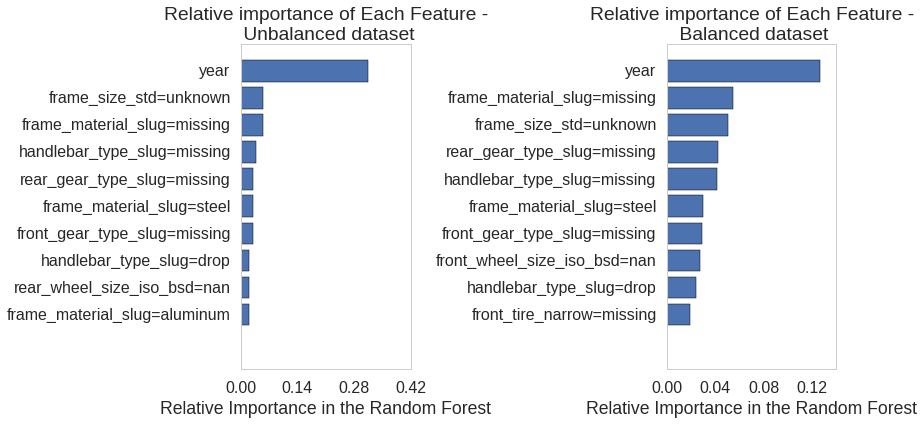

In [96]:
# Create plot of Top 10 significant factors using feature importances

import math
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6), tight_layout = True)
ax = axes.ravel() 
plt1 = ax[0]

importance_list = clfForest.feature_importances_
name_list = features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt1.barh(range(len(name_list)),importance_list,align='center')
plt1.set_yticks(range(len(name_list)))
plt1.set_yticklabels(name_list)
plt1.set_xticks([0, 0.14 ,0.28, 0.42])
plt1.set_xlabel('Relative Importance in the Random Forest')
plt1.set_title('Relative importance of Each Feature -\n Unbalanced dataset')
plt1.grid(False)


plt2 = ax[1]

importance_list = clfForest_balanced.feature_importances_
name_list = features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt2.barh(range(len(name_list)),importance_list,align='center')
plt2.set_yticks(range(len(name_list)))
plt2.set_yticklabels(name_list)
plt2.set_xticks([0, 0.04 ,0.08, 0.12])
plt2.set_xlabel('Relative Importance in the Random Forest')
plt2.set_title('Relative importance of Each Feature -\n Balanced dataset')
plt2.grid(False)


The relative importance chart seems to suggest that adjusting for proportions of stolen bikes in Bike Model year helped bump up the significane of other bike related features. The Model Year continues to be the single most important feature. This can probably be explained by the lack of motivation of long time bike owners to register with BikeIndex.org unless in the event their bike gets stolen.

Finally let us compare the performance of RandomForest on balanced and un-balanced datasets.

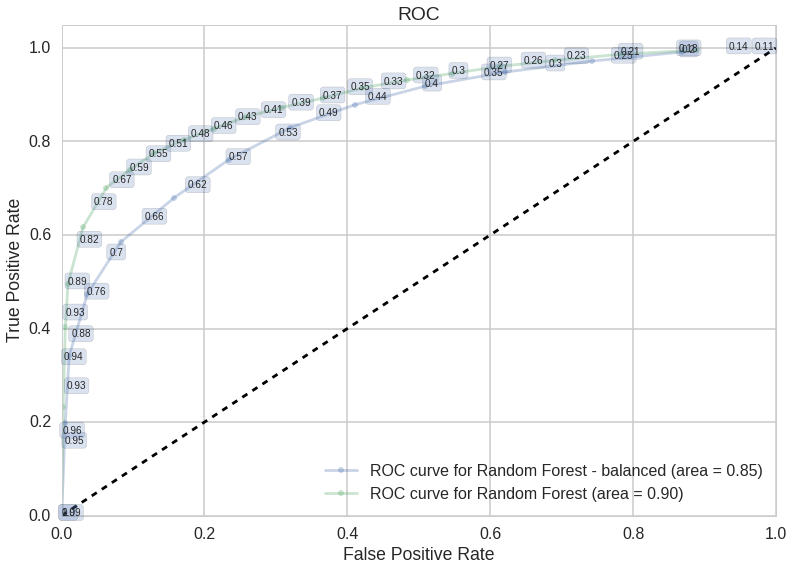

In [97]:
ax = make_roc("Random Forest - balanced",clfForest_balanced, ytest1, Xtest1, None, labe=300, skip=400)
make_roc("Random Forest",clfForest, ytest, Xtest, ax, labe=300, skip=400);


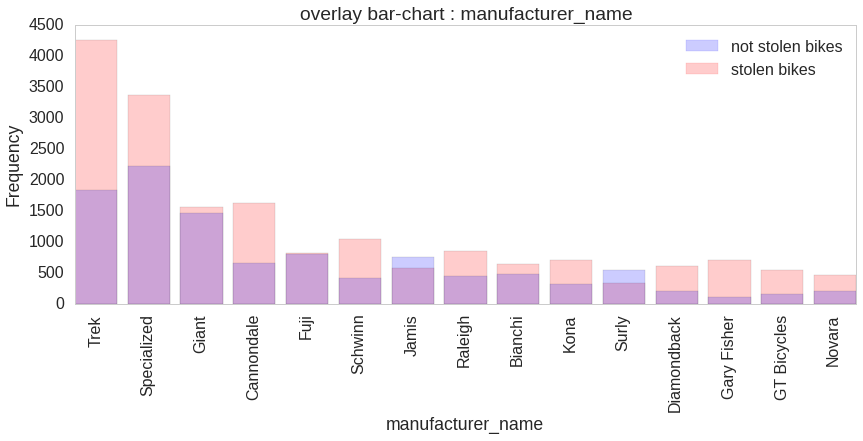

In [98]:
createOverlappingDistributionPlotOfTargetValuesByColumn( df_clean , 'manufacturer_name' , 'stolen' , 15 , None)

Training Randomforest on balanced dataset gave a better picture of the relative importance of features. To take this analysis a step further, we decided to remove the features from the dataset which were indicative that information was missing. Our goal with this is to unmask features which are more interesting to analyze and at the same time having an influence on the bike getting stolen.

In [99]:
finalDF_BM = finalDFBalanced.drop(['frame_material_slug=missing', 'front_tire_narrow=missing', 'frame_size_std=unknown', 'front_gear_type_slug=missing', 'handlebar_type_slug=missing', 'rear_gear_type_slug=missing','rear_wheel_size_iso_bsd=nan', 'front_wheel_size_iso_bsd=nan'], axis = 1)

In [100]:
finalDF_BM.shape

(23083, 756)

In [101]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

itrain, itest = train_test_split(xrange(finalDF_BM.shape[0]), train_size=0.7)
mask=np.ones(finalDF_BM.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [102]:
features1 = []
for x in finalDF_BM.columns :
    if x != 'stolen' :
        features1.append(x)

In [103]:
clfForest_bm = RandomForestClassifier()
parameters = {"n_estimators": range(1, 101, 5)}
clfForest_bm, Xtrain2, ytrain2, Xtest2, ytest2 = do_classify(clfForest_bm, parameters, 
                                                       finalDF_BM, features1, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 46} 0.715992078228 [mean: 0.66413, std: 0.08790, params: {'n_estimators': 1}, mean: 0.69637, std: 0.09971, params: {'n_estimators': 6}, mean: 0.69792, std: 0.08362, params: {'n_estimators': 11}, mean: 0.70621, std: 0.09360, params: {'n_estimators': 16}, mean: 0.70646, std: 0.08782, params: {'n_estimators': 21}, mean: 0.70881, std: 0.09122, params: {'n_estimators': 26}, mean: 0.71209, std: 0.08444, params: {'n_estimators': 31}, mean: 0.71185, std: 0.09085, params: {'n_estimators': 36}, mean: 0.71383, std: 0.08999, params: {'n_estimators': 41}, mean: 0.71599, std: 0.09330, params: {'n_estimators': 46}, mean: 0.71339, std: 0.09375, params: {'n_estimators': 51}, mean: 0.71234, std: 0.09636, params: {'n_estimators': 56}, mean: 0.71141, std: 0.09356, params: {'n_estimators': 61}, mean: 0.71352, std: 0.09375, params: {'n_estimators': 66}, mean: 0.71506, std: 0.09043, params: {'n_estimators': 71}, mean: 0.71345, std: 0.09129, params: {'n_estimators': 76}, mean: 0.71383, s

In [104]:
best_estimator_count = clfForest_bm.get_params()['n_estimators']
print best_estimator_count

46


In [105]:
parameters = {"n_estimators": range(best_estimator_count -6, best_estimator_count+7, 3) , "max_depth" : range ( 1, 49 , 5)}
clfForest_bm, Xtrain2, ytrain2, Xtest2, ytest2 = do_classify(clfForest_bm, parameters, 
                                                       finalDF_BM, features1, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 52, 'max_depth': 41} 0.718838965218 [mean: 0.60583, std: 0.00010, params: {'n_estimators': 40, 'max_depth': 1}, mean: 0.60577, std: 0.00006, params: {'n_estimators': 43, 'max_depth': 1}, mean: 0.60589, std: 0.00022, params: {'n_estimators': 46, 'max_depth': 1}, mean: 0.60577, std: 0.00006, params: {'n_estimators': 49, 'max_depth': 1}, mean: 0.60577, std: 0.00006, params: {'n_estimators': 52, 'max_depth': 1}, mean: 0.65763, std: 0.04998, params: {'n_estimators': 40, 'max_depth': 6}, mean: 0.66444, std: 0.04785, params: {'n_estimators': 43, 'max_depth': 6}, mean: 0.66252, std: 0.04532, params: {'n_estimators': 46, 'max_depth': 6}, mean: 0.66134, std: 0.04552, params: {'n_estimators': 49, 'max_depth': 6}, mean: 0.66203, std: 0.04787, params: {'n_estimators': 52, 'max_depth': 6}, mean: 0.69124, std: 0.08768, params: {'n_estimators': 40, 'max_depth': 11}, mean: 0.68783, std: 0.08594, params: {'n_estimators': 43, 'max_depth': 11}, mean: 0.69179, std: 0.08787, params: {'

In [106]:
best_estimator_count = clfForest_bm.get_params()['n_estimators']
best_max_depth = clfForest_bm.get_params()['max_depth']

print best_estimator_count , best_max_depth

52 41


In [107]:
# Continuing coarse search after addition of min_samples_split parameter

parameters = {"n_estimators":  range(best_estimator_count-4, best_estimator_count+4, 3) , 
              "max_depth" : range(best_max_depth-4, best_max_depth+4, 3) ,
              "min_samples_split": range(15,50,5)}
clfForest_bm, Xtrain2, ytrain2, Xtest2, ytest2 = do_classify(clfForest_bm, parameters, 
                                                       finalDF_BM, features1, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'min_samples_split': 20, 'n_estimators': 54, 'max_depth': 43} 0.715868300532 [mean: 0.71463, std: 0.10416, params: {'min_samples_split': 15, 'n_estimators': 48, 'max_depth': 37}, mean: 0.71544, std: 0.10487, params: {'min_samples_split': 15, 'n_estimators': 51, 'max_depth': 37}, mean: 0.71525, std: 0.10450, params: {'min_samples_split': 15, 'n_estimators': 54, 'max_depth': 37}, mean: 0.71178, std: 0.10990, params: {'min_samples_split': 20, 'n_estimators': 48, 'max_depth': 37}, mean: 0.71228, std: 0.10938, params: {'min_samples_split': 20, 'n_estimators': 51, 'max_depth': 37}, mean: 0.71209, std: 0.11024, params: {'min_samples_split': 20, 'n_estimators': 54, 'max_depth': 37}, mean: 0.71315, std: 0.11053, params: {'min_samples_split': 25, 'n_estimators': 48, 'max_depth': 37}, mean: 0.71036, std: 0.11237, params: {'min_samples_split': 25, 'n_estimators': 51, 'max_depth': 37}, mean: 0.71123, std: 0.11208, params: {'min_samples_split': 25, 'n_estimators': 54, 'max_depth': 37}, mean: 0

In [108]:
best_estimator_count = clfForest_bm.get_params()['n_estimators']
best_max_depth = clfForest_bm.get_params()['max_depth']
best_min_samples_split = clfForest_bm.get_params()['min_samples_split']

print best_estimator_count , best_max_depth , best_min_samples_split

54 43 20


In [109]:
# Fine search to find the best parameters
parameters = {"n_estimators":  range(best_estimator_count-2, best_estimator_count+3, 1) , 
              "max_depth" : range(best_max_depth-2, best_max_depth+3, 1) ,
              "min_samples_split": range(best_min_samples_split-2, best_min_samples_split+3, 1)}
clfForest_bm, Xtrain2, ytrain2, Xtest2, ytest2 = do_classify(clfForest_bm, parameters, 
                                                       finalDF_BM, features1, 'stolen', 1, mask=mask, 
                                                       n_jobs = 30, score_func='accuracy')

using mask


/home/anusha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'min_samples_split': 20, 'n_estimators': 54, 'max_depth': 45} 0.719148409457 [mean: 0.71457, std: 0.10577, params: {'min_samples_split': 18, 'n_estimators': 52, 'max_depth': 41}, mean: 0.71482, std: 0.10589, params: {'min_samples_split': 18, 'n_estimators': 53, 'max_depth': 41}, mean: 0.71525, std: 0.10549, params: {'min_samples_split': 18, 'n_estimators': 54, 'max_depth': 41}, mean: 0.71420, std: 0.10620, params: {'min_samples_split': 18, 'n_estimators': 55, 'max_depth': 41}, mean: 0.71364, std: 0.10711, params: {'min_samples_split': 18, 'n_estimators': 56, 'max_depth': 41}, mean: 0.71197, std: 0.10991, params: {'min_samples_split': 19, 'n_estimators': 52, 'max_depth': 41}, mean: 0.71902, std: 0.10634, params: {'min_samples_split': 19, 'n_estimators': 53, 'max_depth': 41}, mean: 0.71865, std: 0.10823, params: {'min_samples_split': 19, 'n_estimators': 54, 'max_depth': 41}, mean: 0.71847, std: 0.10825, params: {'min_samples_split': 19, 'n_estimators': 55, 'max_depth': 41}, mean: 0

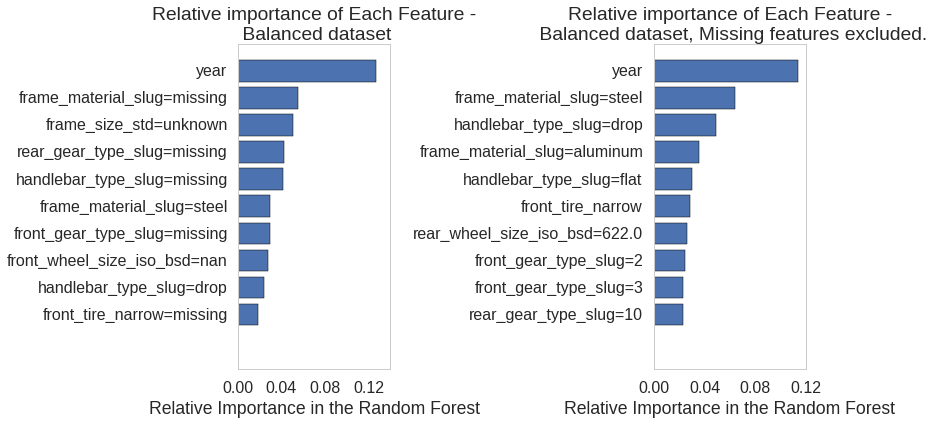

In [110]:
# Create plot of Top 10 significant factors using feature importances

import math
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6), tight_layout = True)
ax = axes.ravel() 
plt1 = ax[0]

importance_list = clfForest_balanced.feature_importances_
name_list = features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt1.barh(range(len(name_list)),importance_list,align='center')
plt1.set_yticks(range(len(name_list)))
plt1.set_yticklabels(name_list)
plt1.set_xticks([0, 0.04 ,0.08, 0.12])
plt1.set_xlabel('Relative Importance in the Random Forest')
plt1.set_title('Relative importance of Each Feature -\n Balanced dataset')
plt1.grid(False)


plt2 = ax[1]

importance_list = clfForest_bm.feature_importances_
name_list = features1
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt2.barh(range(len(name_list)),importance_list,align='center')
plt2.set_yticks(range(len(name_list)))
plt2.set_yticklabels(name_list)
plt2.set_xticks([0, 0.04 ,0.08, 0.12])
plt2.set_xlabel('Relative Importance in the Random Forest')
plt2.set_title('Relative importance of Each Feature -\n Balanced dataset, Missing features excluded.')
plt2.grid(False)

After re-running the analysis, we discovered that the features other than the year and handlebar type, a specific front and rear wheel size, and different frame material types are also affecting the propensity of a bike to get stolen.

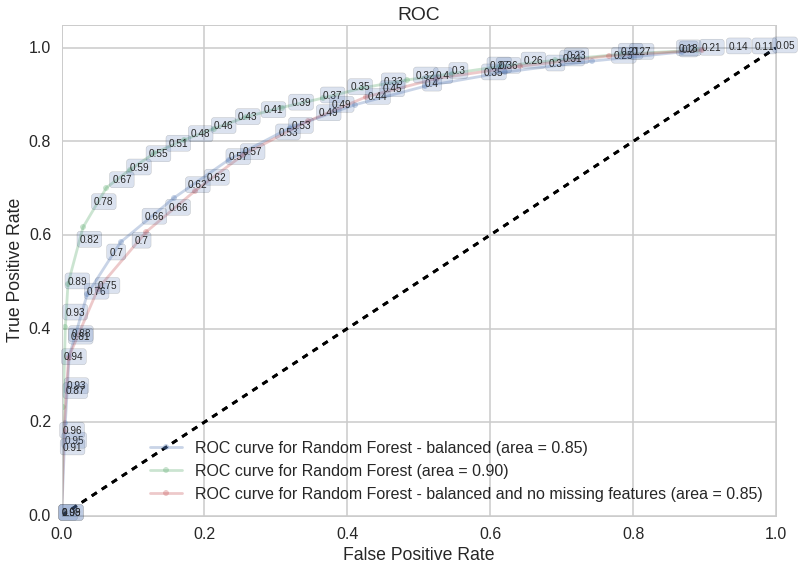

In [111]:
ax = make_roc("Random Forest - balanced",clfForest_balanced, ytest1, Xtest1, None, labe=300, skip=400)
make_roc("Random Forest",clfForest, ytest, Xtest, ax, labe=300, skip=400);
make_roc("Random Forest - balanced and no missing features", clfForest_bm, ytest2, Xtest2, None, labe=300, skip=400)

Dropping missing meatures did not affect the accuracy as well as the AUC, but did help to get more insights on the dataset.

In [113]:
# References: 1)	Josh Fitzpatrick, ‘Bike size chart’   https://www.bikeexchange.co.nz/article/buying-a-full-size-bike
#2)	Roman Pekar, ‘Changing certain values in multiple columns of a pandas DataFrame at once’, Nov 8 2013, 
#http://stackoverflow.com/questions/19867734/changing-certain-values-in-multiple-columns-of-a-pandas-dataframe-at-once
#3)	Viktor Kerkez, ‘pandas plot dataframe barplot with colors by category’, Sep 19 2013, 
#http://stackoverflow.com/questions/18897261/pandas-plot-dataframe-barplot-with-colors-by-category
#4)	Emeth, ‘How to use scikit-learn PCA for features reduction and know which features are discarded’, 
#Apr 25 2014, http://stackoverflow.com/questions/23294616/how-to-use-scikit-learn-pca-for-features-reduction-and-know-which-features-are-d
#5)	Diego, ‘Trouble understanding output from scikit random forest’, Jan 8 2013, 
#http://stackoverflow.com/questions/14207410/trouble-understanding-output-from-scikit-random-forest
#6)	Michael T, python: plot a bar using matplotlib using a dictionary, Mar 18, 
#http://stackoverflow.com/questions/16010869/python-plot-a-bar-using-matplotlib-using-a-dictionary
#7)	Martin Czygan, Phuong Vo.T.H, ‘Random Forests’, ‘Decision Tree’, Getting Started with Python Data Analysis
#8)	http://scikit-learn.org/stable/ - Dimensionality Reduction and classification
#9)	Kirthi Raman, Mastering Python Data Visualization
#10)	Sebastian Raschka, ‘Classification’, Python Machine Learning
#11)	Gerrat, ‘5 maximum values in a python dictionary’, Aug 25 2011, 
#http://stackoverflow.com/questions/7197315/5-maximum-values-in-a-python-dictionary
#12)	Andrea Spadaccini, ‘How to pick a new color for each plotted line within a figure in matplotlib?’, Feb 11 2011, http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
#13)	Coin toss animation idea - http://www.rossmanchance.com/applets/CoinTossing/CoinToss.html
#14)	Bike image in the video: Arleigh , ‘2012 TREK LEXA WOMEN’S ROAD BIKES’ , 18 Oct 2011, 
#http://bikeshopgirl.com/2011/10/2012-trek-lexa-womens-road-bikes/

